## **Table of Contents**

* __[1. Import Data](#import)__
  * [1.1 Import the needed libraries and documents into Jupyter Notebook](#lib)
  * [1.2. Check for duplicates](#duplicates)
* __[2. Digital Contact](#digital_contact)__
  * [2.1 Explore Data](#explore_digital_contact)
    * [2.1.1 Basic Exploration](#dt_basic_exploration)
    * [2.1.2 Statistical Exploration](#dt_statis_exploration)
    * [2.1.3 Visual Exploration](#dt_visual_exploration)
  * [2.2 Preprocess Data](#pprocess_digital_contact)
    * [2.2.1 Missing Values](#dt_missing_values)
    * [2.2.2 Normalizing the Data](#dt_normalizing)
  * [2.3 Modelling](#modelling_digital_contact)
    * [2.3.1 Identify the right number of clusters](#dt_clusters)
    * [2.3.2 Training the model with K-Means](#dt_kmeans)
    * [2.3.3. Visualizing in detail the clusters](#dt_visualize_clusters)
    * [2.3.4. Applying K-means after performing PCA](#dt_PCA_clusters)
    * [2.3.5. Applying DBSCAN](#dt_DBSCAN_clusters)
    * [2.3.6. Applying t-SNE](#dt_TSNE_clusters)
    * [2.3.7. Applying DBSCAN after performing t-SNE](#dt_TSNE_DBSCAN_clusters)
* __[3. Products](#products)__
  * [3.1 Explore Data](#explore_products)
    * [3.1.1 Basic Exploration](#prod_basic_exploration)
    * [3.1.2 Statistical Exploration](#prod_statis_exploration)
    * [3.1.3 Visual Exploration](#prod_visual_exploration)
  * [3.2 Preprocess Data](#pprocess_products)
    * [3.2.1 Data Cleaning - Outliers](#prod_outliers)
    * [3.2.2 Normalizing the Data](#prod_normalidize)
  * [3.3 Modelling](#modelling_products)
    * [3.3.1 Identify the right number of clusters](#prod_clusters)
    * [3.3.2 Training the model with K-Means](#prod_kmeans)
    * [3.3.3. Visualizing in detail the clusters](#prod_visualize_clusters)
    * [3.3.4. Applying K-means after performing PCA](#prod_PCA_clusters)
    * [3.3.5. Applying DBSCAN](#prod_DBSCAN_clusters)
    * [3.3.6. Applying t-SNE](#prod_TSNE_clusters)
    * [3.3.7. Applying K-means after performing t-SNE](#prod_TSNE_kmeans_clusters)
* __[4. Demographic](#demographic)__
  * [4.1 Explore Data](#explore_demographic)
    * [4.1.1 Basic Exploration](#demo_basic_exploration)
    * [4.1.2 Statistical Exploration](#demo_statis_exploration)
  * [4.2 Preprocess Data](#pprocess_demo)
    * [4.2.1 Data Transformation](#demo_data_transformation)
* __[5. Analyzing further](#analyzing_further)__
* __[Annex 1. KNN Imputer Method](#KNN_imputer)__

<a name='import'>
    
<font color = '#BED62F'>
    
# **1. Import Data** </font>
</a>

<a name='lib'></a>

<font color = '#BED62F'>

## **1.1. Import the needed libraries and documents into Jupyter Notebook**

__`Step 1`__ Let's start by importing the libraries and/or functions of which we will be in need throughout our analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import itertools
from sklearn.metrics import silhouette_score as ss
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
from sklearn.metrics import silhouette_score, davies_bouldin_score
from kneed import KneeLocator
from sklearn.impute import KNNImputer
from scipy import stats

__`Step 2`__ Now, we import our files named __`Products.xlsx`__, __`Digital_Contact.csv`__ and __`Demographic.txt`__ into our Jupyter Notebook and view by calling the `head()` method for each of them respectively .

In [2]:
products_df = pd.read_excel(r"Products.xlsx")
digital_df=pd.read_csv(r"Digital_Contact.csv", delimiter=';')
demographic_df=pd.read_csv(r"Demographic.txt", delimiter='\t')

In [3]:
digital_df.head(3)

Cust_ID  Email_Clicks  SM_Comments  App_Clicks  SM_Likes  SM_Shares  \
0        4            72            1           7         7        1.0   
1        5            15           20           1        35       15.0   
2        6             9            7           3        73       19.0   

   SM_Clicks  
0         73  
1         16  
2         10

In [4]:
products_df.head(3)

Cust_ID  Fitness&Gym  Hiking&Running Last_Purchase  TeamGames  \
0        4            0              76    2024-02-19        248   
1        5            0              75    2024-02-17        248   
2        6            6              69    2024-02-15        215   

   OutdoorActivities  TotalProducts  
0                 37              6  
1                 37              6  
2                 34              5

In [5]:
demographic_df.head(3)

Cust_ID                 name  birth_year education_level  dependents  \
0        4    Mr Daniel Spencer        2002          Master           1   
1        5  Miss Abigail Garcia        1994     high school           0   
2        6  Miss Laura Williams        2005             PhD           1   

         City  
0         NaN  
1  Birmingham  
2         NaN

<a name='duplicates'></a>

<font color = '#BED62F'>

## **1.2. Check for duplicates**

__`Step 3`__ Since duplicates lead us to misleading results and sometimes make the data analysis process less efficient, down below we will be dropping them if there exists any. In order to identify them, let us call the method `duplicated()` in each dataframe and remove them if applicable. 

In [6]:
products_df[products_df.duplicated()]

Empty DataFrame
Columns: [Cust_ID, Fitness&Gym, Hiking&Running, Last_Purchase, TeamGames, OutdoorActivities, TotalProducts]
Index: []

In [7]:
digital_df[digital_df.duplicated()]

Empty DataFrame
Columns: [Cust_ID, Email_Clicks, SM_Comments, App_Clicks, SM_Likes, SM_Shares, SM_Clicks]
Index: []

In [8]:
demographic_df[demographic_df.duplicated()]

Empty DataFrame
Columns: [Cust_ID, name, birth_year, education_level, dependents, City]
Index: []

Hence, we can verify that there are no duplicates in any of the dataframes mentioned above. That being said, we can freely go on with the data exploration. In the following sections, we dive into exploring the each of the dataframe seperately.

<a name='digital_contact'></a>

<font color = '#00827F'>
    
# **2. Digital Contact** </font>

<a name='explore_digital_contact'></a>

<font color = '#00827F'>
    
## **2.1 Explore Data** </font>

<a name='dt_basic_exploration'></a>

<font color = '#00827F'>

### **2.1.1 Basic Exploration**

__`Step 4`__ Let's get more information on Digital Contact dataset by calling the method `info()`, which will give us the following insights.

In [9]:
digital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Cust_ID       4000 non-null   int64  
 1   Email_Clicks  4000 non-null   int64  
 2   SM_Comments   4000 non-null   int64  
 3   App_Clicks    4000 non-null   int64  
 4   SM_Likes      4000 non-null   int64  
 5   SM_Shares     3961 non-null   float64
 6   SM_Clicks     4000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 218.9 KB


By the results above, we can verify that we are working with:
- 1 float variable;
- 6 integer variables.

We can also verify that some of the variables have missing values in `SM_Shares`. However, we are going to be working on them in the upcoming section, __`2.2.1`__

<a name='dt_statis_exploration'></a>

<font color = '#00827F'>

### **2.1.2 Statistical Exploration**

__`Step 5`__ Let us make a copy of the above-mentioned dataset, __`Digital Contact`__, as it will be useful when exploring the data in the following sections and we won't be loosing the original dataset in case we need to make further changes. To do that, we simply call the `copy()` method on it as shown below.

In [10]:
digital_df_prod = digital_df.copy()

__`Step 6`__ Setting the index based on `Cust_ID` column for demonstration purposes.

In [11]:
digital_df_prod.set_index(['Cust_ID'], inplace=True)

__`Step 7`__ Defining a brand new dataframe in which we only keep the header of the dataframe `Digital Contact` and naming it `digital_df_prod_columns` (for further in section 2.3.3.).

In [12]:
digital_df_prod_columns = digital_df_prod.columns

__`Step 8`__ Selecting the columns of interest in Digital Contact dataset to explore the data.

In [13]:
digital_df_prod = digital_df_prod[['Email_Clicks', 'App_Clicks', 'SM_Comments','SM_Likes','SM_Shares','SM_Clicks']]

__`Step 9`__ Getting the main descriptive statistics for all the (numeric) variables.

In [14]:
digital_df_prod.describe().T

count       mean        std  min  25%   50%   75%    max
Email_Clicks  4000.0  25.762250  23.659980  0.0  8.0  16.0  36.0   86.0
App_Clicks    4000.0  19.526500  34.237945  0.0  2.0   4.0   7.0  127.0
SM_Comments   4000.0   8.247750   8.064963  0.0  1.0   4.0  15.0   24.0
SM_Likes      4000.0  26.957000  27.742658  0.0  4.0  11.0  50.0   88.0
SM_Shares     3961.0   8.355971   8.696192  0.0  1.0   2.0  16.0   26.0
SM_Clicks     4000.0  30.349250  32.254974  0.0  7.0  15.0  60.0  102.0

- __`SM_Shares`__ - As we have a high standard deviation, it shows the data points are more spread out.
- __`App_Clicks`__  - As we have an even higher standard deviation (comparing to the mean) it is an abnormal distribution and that the data points are even more spread out.
- __`Email_Clicks`__ - Has the higher first and second quartiles, between data.

<a name='dt_visual_exploration'></a>

<font color = '#00827F'>

### **2.1.3 Visual Exploration**

__`Step 10`__ Checking every single variables mentioned above for outliers using Box-Plot.

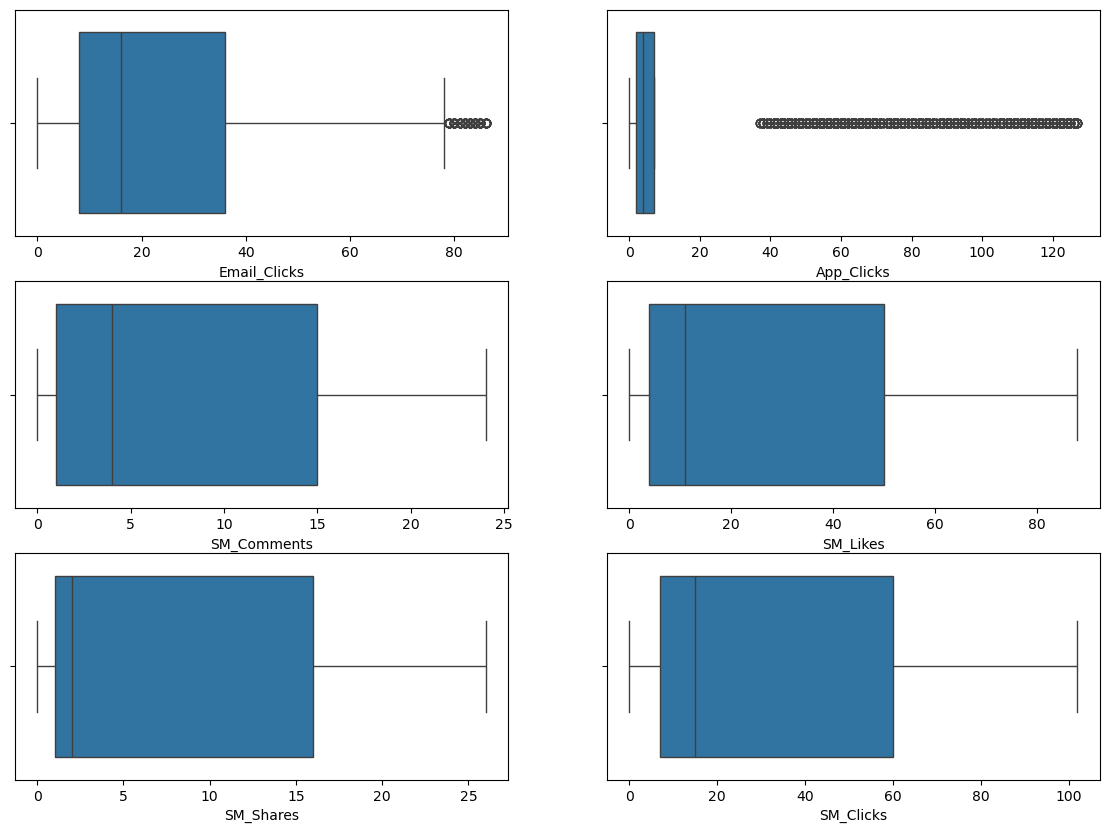

In [15]:
plt.figure(figsize = (14,10))
for i, column in enumerate(digital_df_prod.columns):
    ax = plt.subplot(3,2, i+1)
    sns.boxplot(data = digital_df_prod, x=column)

Please note that by the plots above, we can verify that there are outliers in columns `Email_Clicks` and `App_Clicks`.

__`Step 11`__ Making further analysis on the outliers in `Email_Clicks` and `App_Clicks` via Histplots.

<Axes: xlabel='App_Clicks', ylabel='Count'>

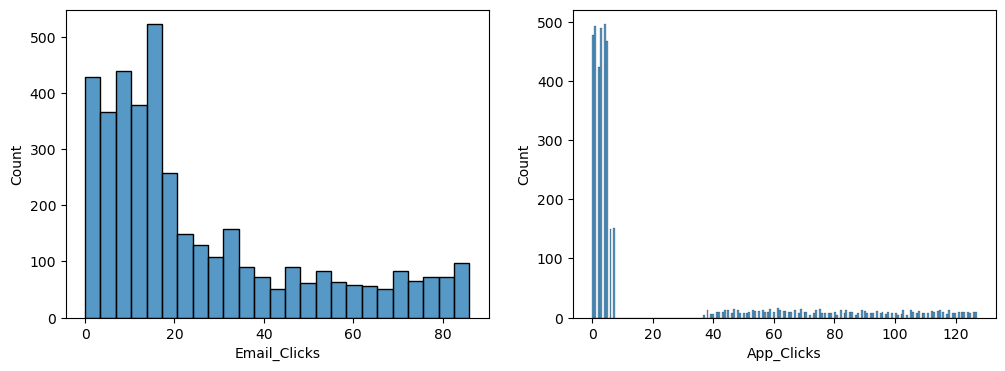

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))
sns.histplot(ax = ax1, data = digital_df, x = 'Email_Clicks')
sns.histplot(ax = ax2, data = digital_df, x = 'App_Clicks')

- Considering the tail on the left, `Email_Clicks` has a right skewed distribution.
- `App_Clicks` has gap between 8 and 37 and outliers above 37. Let us make a deeper analysis on these below to better see whether or not we can work with them.

__`Step 12`__ Analyzing deeper on `App_Clicks` outliers with a dedicated plot.

<Axes: xlabel='App_Clicks', ylabel='Count'>

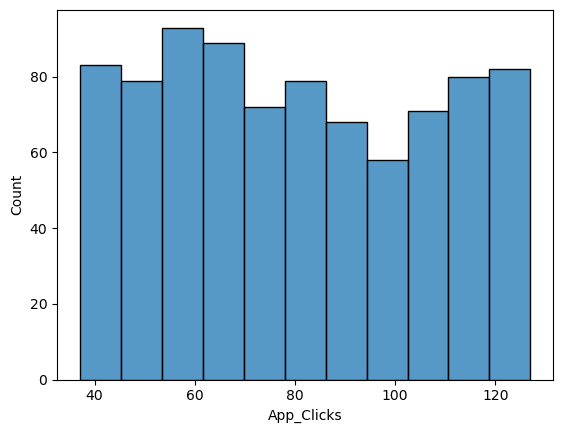

In [17]:
sns.histplot(data = digital_df_prod[digital_df_prod["App_Clicks"]>=30], x = 'App_Clicks')

It seems that the values are quite similar to each other (between 60 and 90).

__`Step 13`__ Counting outliers in `App_Clicks` and `Email_Clicks` to better see how many observations in total we have.

In [18]:
(digital_df_prod["App_Clicks"]>=30).sum()

854

In [19]:
(digital_df_prod["Email_Clicks"]>=80).sum()

171

For the outliers, we consider that given our dataset with 4,000 observations, removing 854 or even 171 data points isn't ideal. This reduction in data size could significantly impact the validity of our statistical tests and hinder our ability to draw meaningful conclusions from the data. For this reason, we will be keeping all the outliers in the columns `App_Clicks` and `Email_Clicks`.

<a name='pprocess_digital_contact'></a>

<font color = '#00827F'>
    
## **2.2 Preprocess Data** </font>

<a name='dt_missing_values'></a>

<font color = '#00827F'>

### **2.2.1 Missing Values**

__`Step 14`__  As we have seen in section 2.1.1, there are __39__ missing values in the column `SM_Shares`. Since there are several ways to handle missing values in a dataset, we we will be using one of the most traditional methods and replace those missing values with zeros. However, we will also be applying KNN Imputer method and see what sort of changes will occur in the descriptive summaries of the variables __[here](#KNN_imputer)__.

In [20]:
digital_df_prod["SM_Shares"].fillna(0.0, inplace=True)

In [21]:
digital_df_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 4 to 6496
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Email_Clicks  4000 non-null   int64  
 1   App_Clicks    4000 non-null   int64  
 2   SM_Comments   4000 non-null   int64  
 3   SM_Likes      4000 non-null   int64  
 4   SM_Shares     4000 non-null   float64
 5   SM_Clicks     4000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 218.8 KB


As a result, we have no more missing values in the respective column. Therefore, we can go on with normalizing our data.

<a name='dt_normalizing'></a>

<font color = '#00827F'>

### **2.2.2 Normalizing the Data**

__`Step 15`__ Nomalizing `Digital Contact` data to have a common scale and range before clustering.

In [22]:
min_max_scaler = MinMaxScaler()
digital_df_prod_scaled = min_max_scaler.fit_transform(digital_df_prod)
digital_df_prod_scaled

array([[0.8372093 , 0.05511811, 0.04166667, 0.07954545, 0.03846154,
        0.71568627],
       [0.1744186 , 0.00787402, 0.83333333, 0.39772727, 0.57692308,
        0.15686275],
       [0.10465116, 0.02362205, 0.29166667, 0.82954545, 0.73076923,
        0.09803922],
       ...,
       [0.39534884, 0.01574803, 0.04166667, 0.01136364, 0.07692308,
        0.51960784],
       [0.13953488, 0.        , 0.70833333, 0.17045455, 0.42307692,
        0.10784314],
       [0.11627907, 0.01574803, 0.41666667, 0.28409091, 0.80769231,
        0.14705882]])

<a name='modelling_digital_contact'></a>

<font color = '#00827F'>
    
## **2.3 Modelling** </font>

<a name='dt_clusters'></a>

<font color = '#00827F'>

### **2.3.1 Identify the right number of clusters**

__`Step 16`__ Let's first use the Elbow Method to identify the number of clusters. In order to do that, we will be simply defining the below-mentioned `for loop` and plot the results accordingly.

In [23]:
# Create function to find out optimum number of clusters
ks=range(2,8)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k).fit(digital_df_prod)
    inertias.append(model.inertia_)

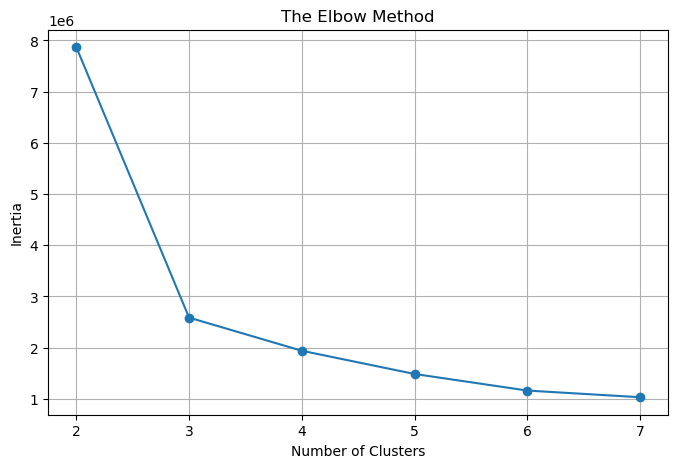

In [24]:
# Generate the elbow plot
fig=plt.subplots(figsize=(8,5))
plt.plot(ks, inertias, 'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid(True)
plt.show()

By the figure above, we can see that the number of clusters we should be having is between 3 and 4, perhaps 5. Let us also plot the `Silhouette scores` of them to better identify the right number of clusters.

__`Step 17`__ Ploting the Silhouette Scores.

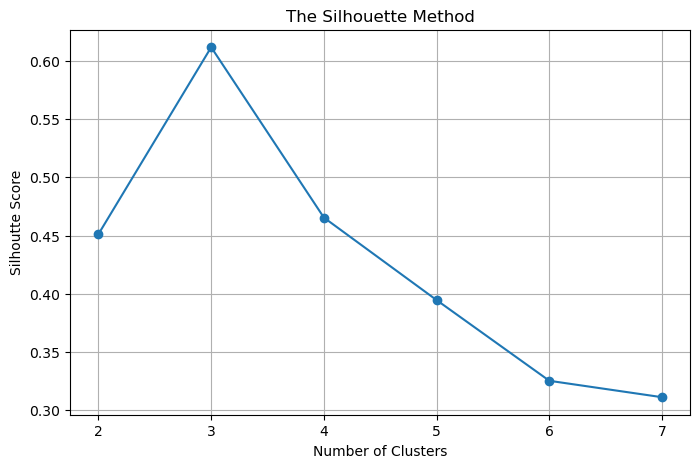

In [25]:
silhouettes=[]
clusters=range(2,8)
for i in clusters:
    model_sil=KMeans(n_clusters=i, random_state=100).fit(digital_df_prod)
    silhouettes.append(silhouette_score(digital_df_prod_scaled, model_sil.labels_))

plt.figure(figsize=(8,5))
plt.plot(clusters,silhouettes, 'o-')
plt.title('The Silhouette Method')
plt.xlabel("Number of Clusters")
plt.xticks(clusters)
plt.ylabel("Silhoutte Score")
plt.grid(True)
plt.show()

We can verify that:
- As we know that __a higher silhouette score indicates better-defined clusters__, we are going to choose __`k=3`__.

<a name='dt_kmeans'></a>

<font color = '#00827F'>

### **2.3.2 Training the model with K-Means**

__`Step 18`__ Creating a KMeans instance called `model_digital_k3` using `KMeans()` and set `n_clusters` as 3, `random_state` as 30. Then, fit the instance to your data (a copy of the original dataframe standardized and named as `digital_df_prod_scaled`).

In [26]:
model_digital_k3 = KMeans(n_clusters = 3, random_state = 30).fit(digital_df_prod_scaled)

__`Step 19`__ Creating a new column in the dataframe named `label`, which will store the cluster number that each observation belongs to.

In [27]:
digital_df_prod['label_kmeans'] = model_digital_k3.labels_
centroids = model_digital_k3.cluster_centers_

__`Step 20`__  Find the centroid of the new clusters using `.mean()`.

In [28]:
digital_df_prod.groupby(['label_kmeans']).mean().transpose()

label_kmeans          0          1          2
Email_Clicks  55.628319   9.682081  18.124122
App_Clicks     3.501207   2.483973  80.827869
SM_Comments    0.998391  15.781923   2.010539
SM_Likes       5.539019  51.545455   3.339578
SM_Shares      1.003218  16.301629   0.970726
SM_Clicks     76.072405   9.521282  10.210773

__Cluster 0:__<br>
- The customers intereacting more via Email_Clicks (55.6) and SM_Clicks (76.1) <br>
- The customers intereacting moderately via SM_Shares (1.0), App_Clicks (3.5) and SM_Likes (5.5)  <br>
- The customers intereacting less via SM_Comments (0.99) <br>

__Cluster 1:__<br>
- The customers intereacting though Social Media actions such as SM_Comments (15.8), SM_Shares (16.3) and SM_Likes (51.5) <br>
- The customers intereacting moderately on: None <br>
- The customers intereacting less on: App_Clicks (2.5), SM_Clicks (9.5) and Email_Clicks (9.7) <br>

__Cluster 2:__<br>
- The customers who have interacted more on: App_Clicks (80.8) <br>
- The customers who have interacted moderately on: SM_Comments (2.0), SM_Clicks	(10.2) and Email_Clicks (18.1) <br>
- The customers who have interacted less on: SM_Shares (1.0) and SM_Likes (3.3) <br>

<a name='dt_visualize_clusters'></a>

<font color = '#00827F'>

### **2.3.3. Visualizing in detail the clusters**

__`Step 21`__  Creating scatter plots for all variables in `Digital Contact`.

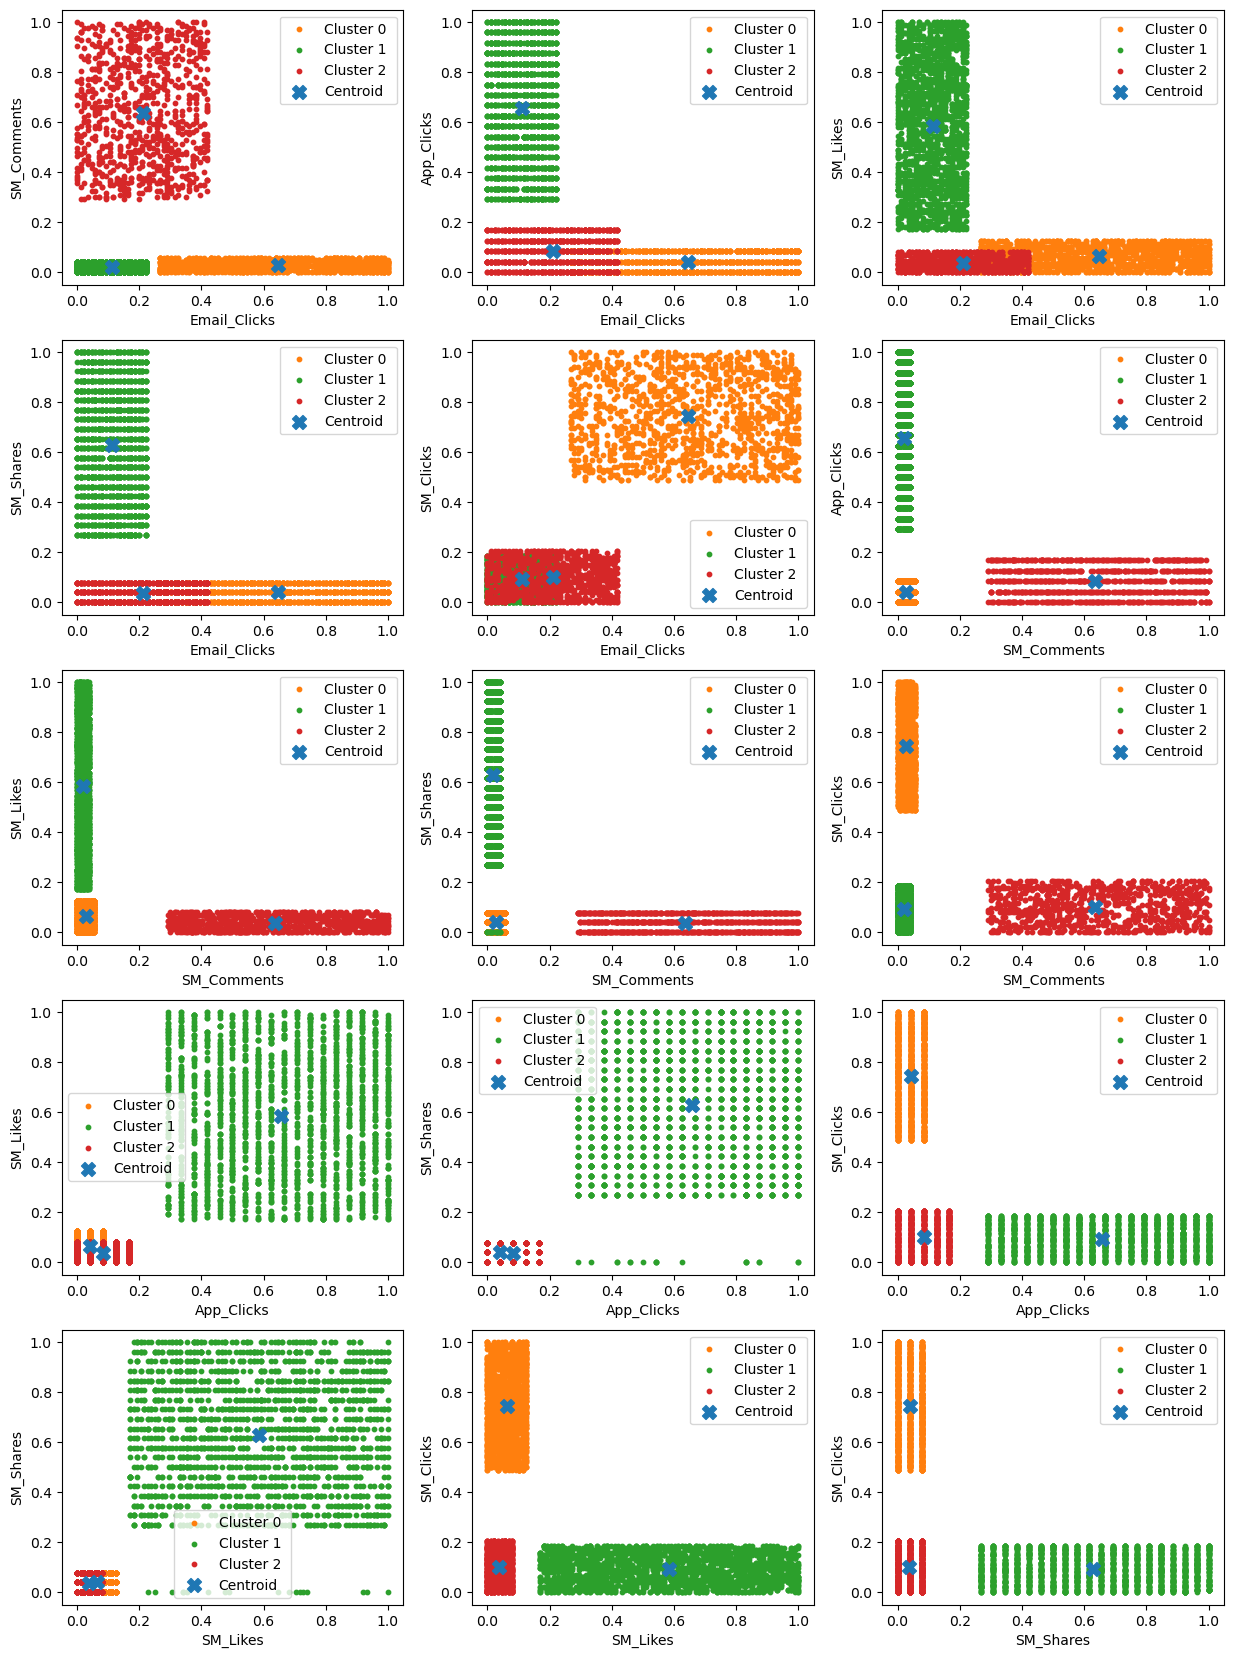

In [29]:
plt.figure(figsize=(15,25))
columns=digital_df_prod_columns
plot_i=1
for i, x in enumerate(columns):   
    list_y=columns[i+1:]
    for j in range(i+1,len(columns)):
        plt.subplot(6,3, plot_i)
        for ii, cen in enumerate(centroids):
            plt.scatter(digital_df_prod_scaled[digital_df_prod['label_kmeans']==ii,i], digital_df_prod_scaled[digital_df_prod['label_kmeans']==ii,j],s=10, label=f"Cluster {ii} ", color=f'C{ii+1}')
        plt.scatter(centroids[:,i], centroids[:,j],marker='X', label='Centroid', s=100 )
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.legend()
        plot_i+=1

From the above-mentioned plots and information gathered in Step 20, we can conclude the following.

- __`Cluster 0`__ - Comprising individuals who primarily engage in passive consumption by clicking on social media and email content, this group shows minimal activity in terms of sharing, commenting, and app usage. Referred to as __"Curious-Viewers"__ they exhibit a tendency to explore content without active participation.
- __`Cluster 1`__ - Characterized by individuals who actively engage with content by liking, sharing, and commenting frequently, this group demonstrates a strong influence on social media platforms. Despite moderate app usage, their primary focus remains on social interaction. This group, labeled as __"Influencers"__ plays a significant role in shaping online discourse.
- __`Cluster 2`__ - Encompassing individuals who predominantly utilize the app while showing limited activity on social media, this group exhibits minimal engagement in terms of sharing and commenting. Referred to as __"App users"__ their behavior suggests a preference for app-centric interactions over social media engagement.

<a name='dt_PCA_clusters'></a>

<font color = '#00827F'>

### **2.3.4. Applying K-means after performing PCA**

__`Step 22`__ Performing and fitting the PCA model to the scaled dataset `digital_df_prod_scaled`.

In [30]:
pca=PCA()
pca.fit(digital_df_prod_scaled)

PCA()

__`Step 23`__ Obtaining the proportion of the `digital_df_prod_scaled` variance explained by a single principal component.

In [31]:
pca.explained_variance_ratio_

array([0.63731402, 0.22077003, 0.04823786, 0.04154044, 0.03197772,
       0.02015993])

__`Step 24`__ Plotting to decide how many features we are going to keep.

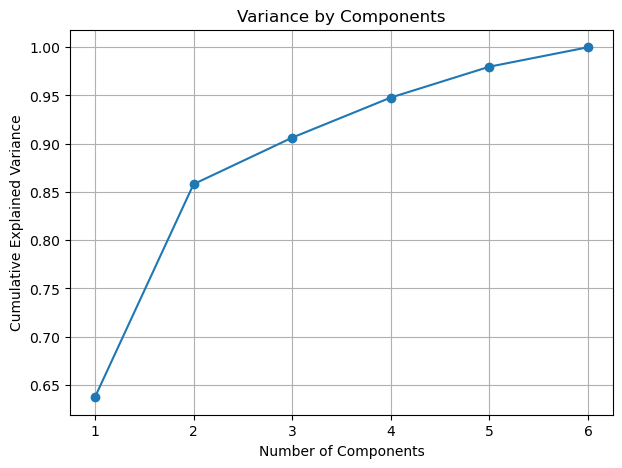

In [32]:
plt.figure(figsize=(7,5))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

From the plot, we understand that:
- The optimal __number of components__ in PCA that involves a balance between preserving enough information from the original dataset while reducing dimensionality is __2__.

__`Step 25`__ Performing PCA with dimensionality reduction (Number of Components = 2 and Cumulative Explained Variance = 85%)

In [33]:
pca=PCA(n_components=2)

In [34]:
pca.fit(digital_df_prod_scaled)

PCA(n_components=2)

__`Step 26`__ Transforming the original  `digital_df_prod_scaled` dataset into the 2-dimensional space

In [35]:
scores_pca=pca.transform(digital_df_prod_scaled)

In [36]:
scores_pca

array([[-0.73228441, -0.35895767],
       [ 0.53651762, -0.10975337],
       [ 0.57766587, -0.08099617],
       ...,
       [-0.50766296, -0.10569557],
       [ 0.32666142,  0.01625801],
       [ 0.41124587, -0.03941202]])

- __`scores_pca`__ contains the transformed `digital_df_prod_scaled` dataset, where each row represents a data point and each column represents a principal component

__`Step 27`__ Appling K-means with PCA (in order to cluster the data in a lower-dimensional space)

In [37]:
model_kmeans_pca=KMeans(n_clusters=3, random_state=30).fit(scores_pca)

__`Step 28`__ Visualizing K-means with PCA

In [38]:
digital_df_prod[['Component1', 'Component2']]=scores_pca
digital_df_prod['label_pca_kmeans']=model_kmeans_pca.labels_

In [39]:
centroids_pca_kmeans=model_kmeans_pca.cluster_centers_

In [40]:
#digital_df_prod.groupby(['label_pca_kmeans']).mean().transpose()

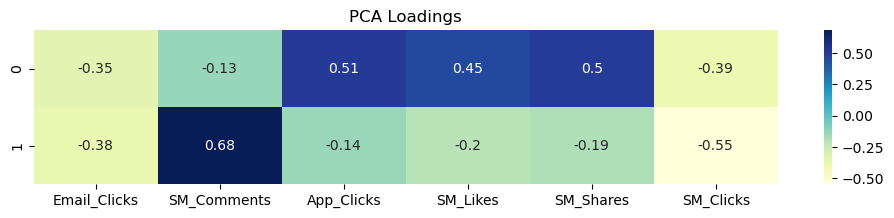

In [41]:
pca_loadings_df=pd.DataFrame(pca.components_, columns=digital_df_prod_columns)
plt.figure(figsize=(12, 2))
sns.heatmap(pca_loadings_df, cmap="YlGnBu", annot=True)
plt.title('PCA Loadings')
plt.show()

In [42]:
pca_loadings_df

Email_Clicks  SM_Comments  App_Clicks  SM_Likes  SM_Shares  SM_Clicks
0     -0.349401    -0.134724    0.507828  0.450827   0.496040  -0.390613
1     -0.377073     0.682894   -0.138325 -0.201002  -0.185393  -0.545495

From the results above, we can verify that:
 
__`Component 1 (Row 0):`__
- `App_Clicks`, `SM_Likes` and `SM_Shares` - The positive impact of App_Clicks, SM_Likes, and SM_Shares on Component 1 suggests a correlation between them. __Customers who frequently interact with the company's App, engage with Social Media content by liking posts and sharing content from Sportify.__ These behaviors collectively reflect a comprehensive approach to digital interaction, where customers who exhibit one type of engagement are likely to demonstrate similar patterns across other channels.
 
__`Component 2 (Row 1):`__
 
- It suggests that customer engagement through comments on social media posts `SM_Comments` plays a crucial role in defining a particular clustering pattern. __This indicates that customers who actively engage by commenting on social media content may exhibit distinct behaviors or preferences that differentiate them from other customer segments.__ On the other hand, actions such as Email_Clicks, App_Clicks, SM_Likes, SM_Shares, and SM_Clicks appear to have less influence on this clustering pattern.

__`Step 29`__ Visualizing clusters from PCA-KMeans

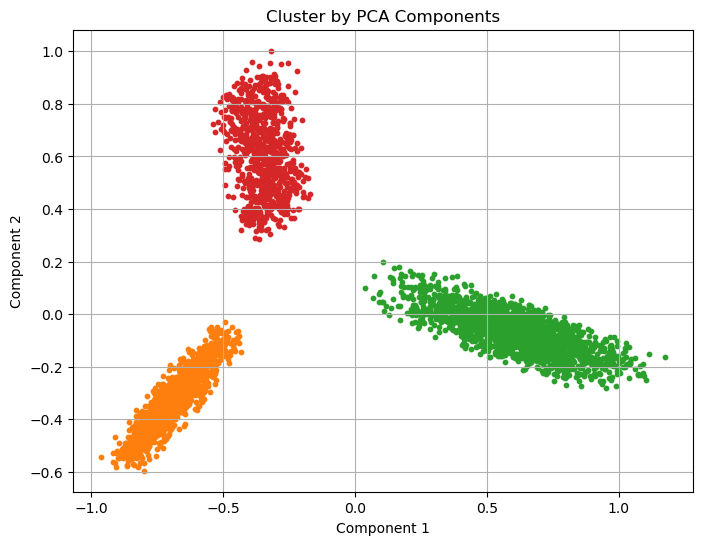

In [43]:
plt.figure(figsize=(8,6))
for ii, cen in enumerate(centroids):
    plt.scatter(scores_pca[digital_df_prod['label_pca_kmeans']==ii,0], scores_pca[digital_df_prod['label_pca_kmeans']==ii,1],s=10, label=f"Cluster {ii} ", color=f'C{ii+1}')
plt.title("Cluster by PCA Components")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

From the plot above, we can verify that:

- The __`Orange clusters`__ represent the customers who exhibit __minimal engagement with email, app interactions, and social media activities.__

- The __`Green clusters`__ represent the customers who __frequently interact with the company's App, engage with Social Media content by liking posts and sharing content from Sportify.__

- The __`Red clusters`__ represent the customers who __actively engage by commenting on social media content may exhibit distinct behaviors or preferences that differentiate them from other customer segments.__

__`Step 30`__ Checking if there are discrepancies in cluster assignments between K-means and K-means with PCA.

In [44]:
dif_pca_notPca=digital_df_prod[digital_df_prod['label_pca_kmeans']!=digital_df_prod['label_kmeans']]

In [45]:
dif_pca_notPca.groupby(['label_kmeans','label_pca_kmeans']).agg(['mean'])

Empty DataFrame
Columns: [(Email_Clicks, mean), (App_Clicks, mean), (SM_Comments, mean), (SM_Likes, mean), (SM_Shares, mean), (SM_Clicks, mean), (Component1, mean), (Component2, mean)]
Index: []

__`Step 31`__ Checking their performance applying `silhouette score` method.

In [46]:
sil_scores = {
    "K-means": silhouette_score(digital_df_prod_scaled, digital_df_prod['label_kmeans']),
    "K-means with pca ": silhouette_score(digital_df_prod_scaled, digital_df_prod['label_pca_kmeans'])
}
sil_scores

{'K-means': 0.6117930207101633, 'K-means with pca ': 0.6117930207101633}

We can verify that no discrepancies were found and their performance are the same. It suggests that the dimensionality reduction performed by PCA did not significantly alter the clustering structure or separation of the data points, impling that __PCA did not lead to any significant improvement or degradation in clustering performance__.

<a name='dt_DBSCAN_clusters'></a>

<font color = '#00827F'>

### **2.3.5. Applying DBSCAN**

__`Step 32`__ Unlike K-Means, we do not need to pre-define the number of clusters before applying the algorithm. However, in order not to have misleading results afterwards, defining the best `eps` and `min_samples` values below is essential.

For example:

To apply the DBSCAN model, first, we need to obtain its 2 parameters: Min_Samples and Epsilon (Eps):
- __`Min_Samples`__ - Generally 2* Data dimension, since our data has 6 dimensions then 2*6 columns = 12;
- __`Epsilon (Eps)`__ - We have to calculate the distance between each point to its closest neighbor using Nearest Neighbours. After that, sort them and plot, finaly we identify the maximum value at the curvature of the graph, which will define our optimum Eps.

__`Step 33`__ Calculating the K-nearest neighbor (K-NN) distances for each data point in `digital_df_prod_scaled` dataset and then plotting the sorted K-NN distances to define __`Eps`__

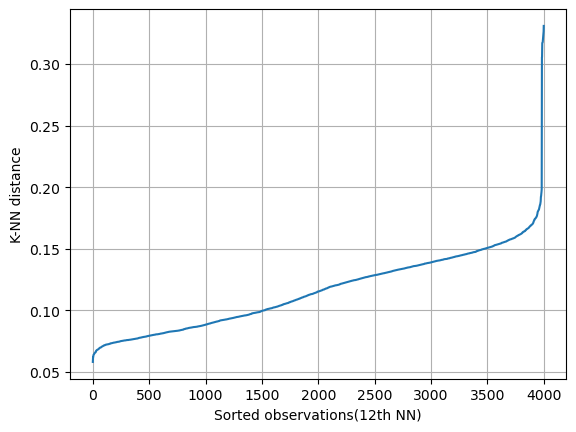

In [47]:
nbrs=NearestNeighbors(n_neighbors=13).fit(digital_df_prod_scaled)
dist, ind= nbrs.kneighbors(digital_df_prod_scaled)
sort_dist= np.sort(dist, axis=0)
k_dist=sort_dist[:, 12]
plt.plot(k_dist)
plt.ylabel("K-NN distance")
plt.xlabel("Sorted observations(12th NN)") # using the same as min_samples
plt.grid(True)
plt.show()

From the plot we can check:
- The value for our `Eps` should be greater or equal to __0.15__.

__`Step 34`__ Analyzing further to better define Epsilon and Min_Samples

By defining the below function called `get_scores_and_labels()`, we aim to guess the optimum values for above-mentioned parameters.

In [48]:
# Defining the variables to be applied in our get_scores_and_labels() function
epsilons = np.linspace(0.15, 0.5, num=10) 
min_samples = np.arange(12, 14, step=2)
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)

In [49]:
def get_scores_and_labels(combinations, df):
    scores = []
    all_labels_list = []
    
    for i, (eps, num_samples) in enumerate(combinations):
        dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(df)
        labels = dbscan_cluster_model.labels_
        labels_set = set(labels)
        num_clusters = len(labels_set)
        if -1 in labels_set:
            num_clusters -= 1
    
        if (num_clusters < 2) or (num_clusters > 5):
            scores.append(-10)
            all_labels_list.append('bad')
            c = (eps, num_samples)
            print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
            continue
    
        scores.append(ss(df, labels))
        all_labels_list.append(labels)
        print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

    best_index = np.argmax(scores)
    best_parameters = combinations[best_index]
    best_labels = all_labels_list[best_index]
    best_score = scores[best_index]

    return {'best_epsilon': best_parameters[0],
            'best_min_samples': best_parameters[1], 
            'best_labels': best_labels,
            'best_score': best_score}

In [50]:
best_values = get_scores_and_labels(combinations, digital_df_prod_scaled)

Index: 0, Score: 0.47896866625380874, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Index: 1, Score: 0.48552700021995226, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Index: 2, Score: 0.48552700021995226, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Index: 3, Score: 0.48552700021995226, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Index: 4, Score: 0.6117930207101633, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Index: 5, Score: 0.6117930207101633, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Index: 6, Score: 0.6117930207101633, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Combination (0.4222222222222223, 12) on iteration 8 of 10 has 1 clusters. Moving on
Combination (0.46111111111111114, 12) on iteration 9 of 10 has 1 clusters. Moving on
Combination (0.5, 12) on iteration 10 of 10 has 1 clusters. Moving on


In [51]:
best_values

{'best_epsilon': 0.3055555555555556,
 'best_min_samples': 12,
 'best_labels': array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 'best_score': 0.6117930207101633}

__`Step 35`__ Computing DBSCAN with __Eps = 0.3 and Min_Samples = 12__

In [52]:
digital_df_prod['label_dbscan'] = best_values['best_labels']

digital_df_prod['label_dbscan'].value_counts()

label_dbscan
1    1903
0    1243
2     854
Name: count, dtype: int64

__`Step 36`__ Visualizing the clustering results from DBSCAN algorithm.

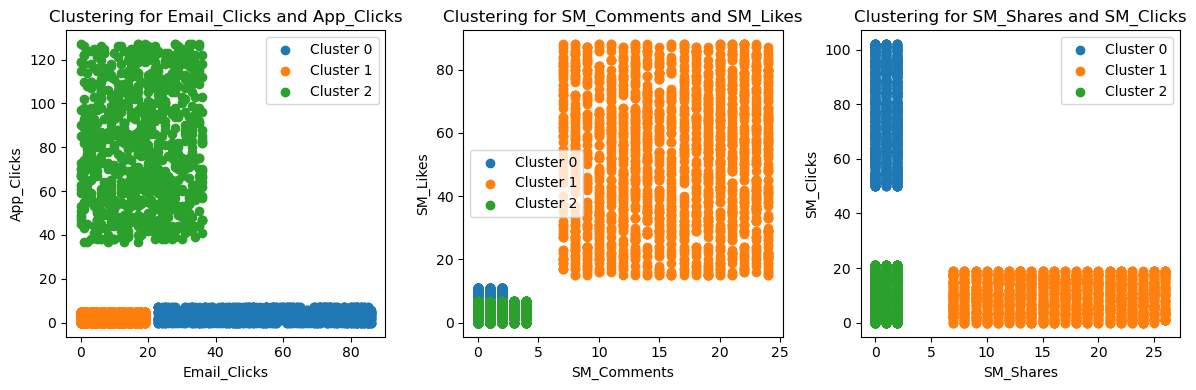

In [53]:
column_pairs = [("Email_Clicks", "App_Clicks"),("SM_Comments", "SM_Likes"),("SM_Shares", "SM_Clicks"),]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, (col1, col2) in enumerate(column_pairs):
    ax = axes[i]  # Access the current subplot
    for cluster_label in range(3):
        cluster_data = digital_df_prod[digital_df_prod['label_dbscan'] == cluster_label]
        ax.scatter(cluster_data[col1], cluster_data[col2], label=f"Cluster {cluster_label}")

    ax.set_xlabel(col1)
    ax.set_ylabel(col2)
    ax.set_title(f"Clustering for {col1} and {col2}")
    ax.legend()

plt.tight_layout()
plt.show()

By the plots above, we can also conclude that
* __`Cluster 0`__: represents users interacting via clicks over `Email` and `Social Media platforms` (`Email_Clicks` and `SM_Clicks`) while they do not use the company's `App` nor share/like/post on their Social Media accounts.
* __`Cluster 1`__: demonstrates that users who belong to this cluster have the most number of `Likes`, `Comments` and `Shares` on Social Media. On the other hand, they might not prefer to use the company's `App` nor clicking any ads on both `Email` and `Social Media`.
* __`Cluster 2`__: This cluster basically tells us that there are such users who utilize the `App` and have fewer interactions over `Email`, compared to `cluster 0`, but they do not make any interaction through `Social Media` platforms. So they might not be using SM in their daily lives.

<a name='dt_TSNE_clusters'></a>

<font color = '#00827F'>

### **2.3.6. Applying t-SNE**

Summary:
- Perplexity is a critical hyperparameter in t-SNE (t-distributed Stochastic Neighbor Embedding), regulating the number of neighbors each point considers;
- By assessing the KL (Kullback-Leibler) divergence metric across different perplexity values, we can determine the most suitable perplexity;
- Lower KL divergence indicates superior results, signifying better preservation of the data's structure.

__`Step 37`__ Applying t-SNE with perplexity = 50 <br>
(it indicates that each point considers approximately 50 nearest neighbors when embedding the data into a lower-dimensional space)

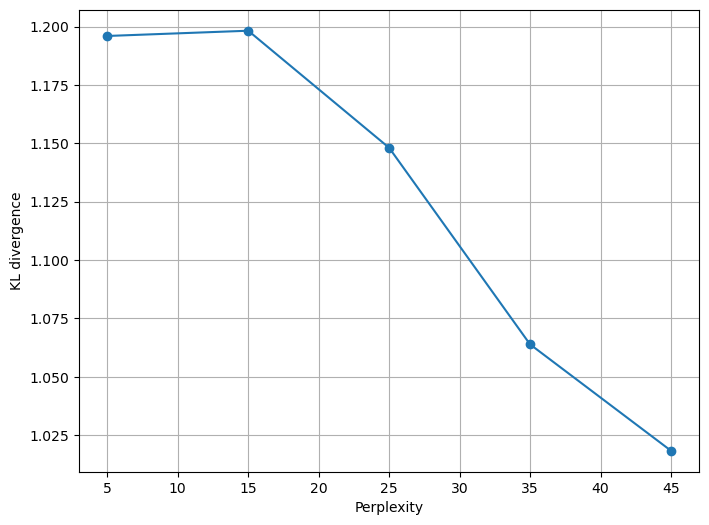

In [54]:
kl_divergs=[]
for i in range(5,50,10):
    model=TSNE(n_components=2, init="pca"  , perplexity=i)
    reduced=model.fit_transform(digital_df_prod_scaled)
    kl_divergs.append(model.kl_divergence_)

plt.figure(figsize=(8,6))
plt.plot(range(5,50,10), kl_divergs, marker='o')
plt.xlabel('Perplexity')
plt.ylabel('KL divergence')
plt.grid(True)
plt.show()

In [55]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
tsne_results = tsne.fit_transform(digital_df_prod_scaled)

In [56]:
tsne_results

array([[-22.640322 , -29.056423 ],
       [ 17.225142 ,  -8.878078 ],
       [ 35.744358 ,   6.3745947],
       ...,
       [-29.65666  ,   0.2695603],
       [ 15.020803 , -20.849365 ],
       [  0.5878956,   0.7703812]], dtype=float32)

__`Step 38`__ Accessing the Kullback-Leibler (KL) divergence value

In [57]:
tsne.kl_divergence_

0.9898319840431213

- As we know that a KL divergence value close to 1 indicates that the algorithm has made considerable progress in aligning the distributions, with a KL divergence of approximately 0.9898 we can consider that the t-SNE embedding has achieved a reasonably good alignment with the original data distribution.

__`Step 39`__ Generating a scatter plot visualization using Plotly Express (px) to display the results of the t-SNE algorithm.

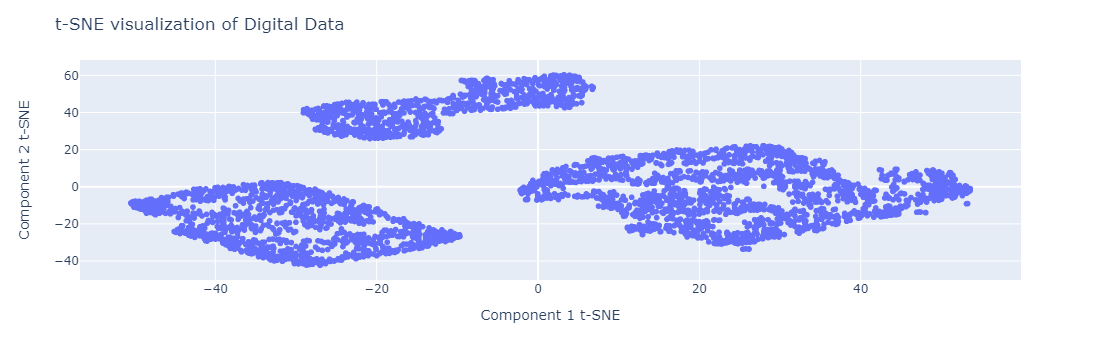

In [58]:
fig = px.scatter(x=tsne_results[:, 0], y=tsne_results[:, 1])
fig.update_layout(
    title="t-SNE visualization of Digital Data",
    xaxis_title="Component 1 t-SNE",
    yaxis_title="Component 2 t-SNE",
)
fig.show()

We can check that:
- After applyng `t-SNE` our  clusters looks more defined.

<a name='dt_TSNE_DBSCAN_clusters'></a>

<font color = '#00827F'>

### **2.3.7. Applying DBSCAN after performing t-SNE**

__`Step 40`__ In this subchapter  we are applying DBSCAN after t-SNE to see if we get a better performance result.

First we need to define Min_Samples and Epsilon (Eps):
- __`Min_Samples`__ - 2* Data dimension, and now our data has 2 dimensions: 2*2 components = 4
- __`Epsilon (Eps)`__ - Calculated using Nearest Neighbors

__`Step 41`__ Calculating and plotting the K-nearest neighbor (K-NN) distances for each data point in the t-SNE, in order to determine the epsilon parameter for density-based clustering algorithms like DBSCAN

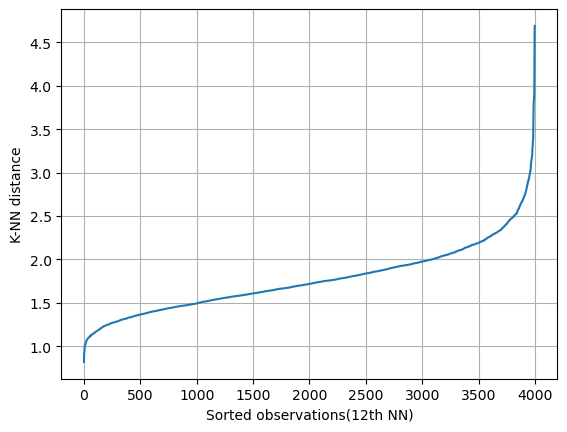

In [59]:
# turning the code below into comments since it takes a while for it to be executed.

nbrs=NearestNeighbors(n_neighbors=13).fit(tsne_results)
dist, ind= nbrs.kneighbors(tsne_results)
sort_dist= np.sort(dist, axis=0)
k_dist=sort_dist[:, 12]
plt.plot(k_dist)
plt.ylabel("K-NN distance")
plt.xlabel("Sorted observations(12th NN)") # using the same as min_samples
plt.grid(True)
plt.show()

From the plot we can check:
- The value for our `Eps` should be greater or equal to __2.5__.

In [60]:
# Defining the variables to be applied in our get_scores_and_labels() function
epsilons = np.linspace(2.5, 5.0, num=10) 
min_samples = np.arange(4, 6, step=2)
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)

In [61]:
best_values_dbscan_tsne = get_scores_and_labels(combinations, tsne_results)

Index: 0, Score: 0.3398230969905853, Labels: [0 1 1 ... 0 1 1], NumClusters: 5
Index: 1, Score: 0.3398230969905853, Labels: [0 1 1 ... 0 1 1], NumClusters: 5
Index: 2, Score: 0.4189140200614929, Labels: [0 1 1 ... 0 1 1], NumClusters: 4
Index: 3, Score: 0.4189140200614929, Labels: [0 1 1 ... 0 1 1], NumClusters: 4
Index: 4, Score: 0.6137598156929016, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Index: 5, Score: 0.6137598156929016, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Index: 6, Score: 0.6137598156929016, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Index: 7, Score: 0.6137598156929016, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Index: 8, Score: 0.6137598156929016, Labels: [0 1 1 ... 0 1 1], NumClusters: 3
Index: 9, Score: 0.6137598156929016, Labels: [0 1 1 ... 0 1 1], NumClusters: 3


In [62]:
best_values_dbscan_tsne

{'best_epsilon': 3.611111111111111,
 'best_min_samples': 4,
 'best_labels': array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 'best_score': 0.6137598}

__`Step 42`__ Computing DBSCAN after t-SNE with __Eps = 3.61 and Min_Samples = 4__

In [63]:
model_dbscan_digital= DBSCAN(eps=3.61, min_samples=4).fit(tsne_results)
digital_df_prod['label_tsne_dbscan']=model_dbscan_digital.labels_

In [64]:
digital_df_prod[['Component1_tsne', 'Component2_tsne']]=tsne_results

In [65]:
digital_df_prod.groupby('label_tsne_dbscan').size()

label_tsne_dbscan
0    1243
1    1903
2     854
dtype: int64

__`Step 44`__ Generating a scatter plot to visualize the clusters identified by DBSCAN after performing t-distributed Stochastic Neighbor Embedding (t-SNE) for dimensionality reduction

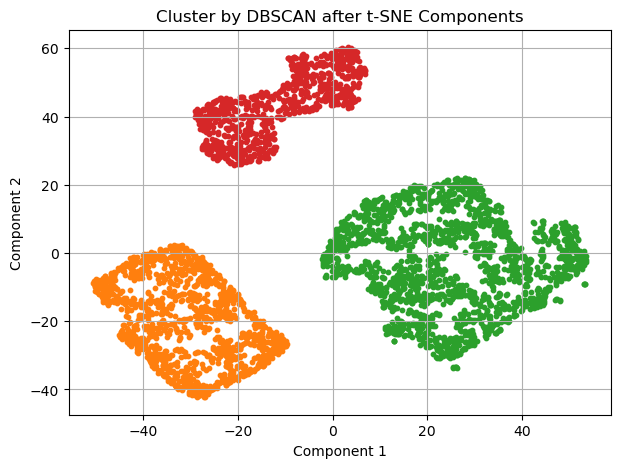

In [66]:
plt.figure(figsize=(7,5))
for i in range(3):
    plt.scatter(tsne_results[digital_df_prod['label_tsne_dbscan']==i,0], tsne_results[digital_df_prod['label_tsne_dbscan']==i,1],s=10, label=f"Cluster {i} ", color=f'C{i+1}')
plt.title("Cluster by DBSCAN after t-SNE Components")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

__`Step 45`__ Checking if there are discrepancies in cluster assignments between K-means, DBSCAN, K-means with PCA, and DBSCAN with t-SNE.

In [67]:
dif_pca_notPca=digital_df_prod[digital_df_prod['label_pca_kmeans']!=digital_df_prod['label_tsne_dbscan']]

In [68]:
dif_pca_notPca

Empty DataFrame
Columns: [Email_Clicks, App_Clicks, SM_Comments, SM_Likes, SM_Shares, SM_Clicks, label_kmeans, Component1, Component2, label_pca_kmeans, label_dbscan, label_tsne_dbscan, Component1_tsne, Component2_tsne]
Index: []

__`Step 46`__ Analyzing DBSCAN after performing t-SNE clusters.

In [69]:
digital_df_prod.groupby(['label_tsne_dbscan'])[digital_df_prod_columns].mean().transpose()

label_tsne_dbscan          0          1          2
Email_Clicks       55.628319   9.682081  18.124122
SM_Comments         0.998391  15.781923   2.010539
App_Clicks          3.501207   2.483973  80.827869
SM_Likes            5.539019  51.545455   3.339578
SM_Shares           1.003218  16.301629   0.970726
SM_Clicks          76.072405   9.521282  10.210773

__`Step 47`__ From the above-mentioned table, we seem to have the same results as in K-Means, so let's verify the performance of all the 4 methods we have applied by `silhouette score` method.

In [70]:
sil_scores = {
    "K-means": silhouette_score(digital_df_prod_scaled, digital_df_prod['label_kmeans']),
    "DBSCAN": silhouette_score(digital_df_prod_scaled, digital_df_prod['label_dbscan']),
    "K-means with pca ": silhouette_score(digital_df_prod_scaled, digital_df_prod['label_pca_kmeans']),
    "DBSCAN with t-SNE": silhouette_score(digital_df_prod_scaled, digital_df_prod['label_tsne_dbscan'])
}

In [71]:
sil_scores

{'K-means': 0.6117930207101633,
 'DBSCAN': 0.6117930207101633,
 'K-means with pca ': 0.6117930207101633,
 'DBSCAN with t-SNE': 0.6117930207101633}

From the results, we can verify that the clustering methods—K-means, DBSCAN, K-means with PCA, and DBSCAN with t-SNE—all achieved a consistent silhouette score of around 0.6118. This implies that, judging solely by the silhouette coefficient, these methods exhibit similar clustering quality on the dataset. Moreover, these methods consistently produced similar clustering outcomes. Hence, regardless of the specific method chosen, the resulting clusters will be as follows.



- __`Cluster 0 - Curious-Viewers:`__
This cluster, labeled as "Curious-Viewers," represents customers who __actively explore digital content through clicks on emails and social media links__, as indicated by their higher engagement with Email_Clicks and SM_Clicks.
While they exhibit curiosity-driven behavior in exploring digital content, their interaction beyond clicks, such as sharing, liking, and commenting, is minimal.
 
- __`Cluster 1 - Influencers:`__
Labeled as "Influencers," this cluster consists of customers who __actively participate in social media interactions, with high levels of SM_Comments, SM_Shares, and SM_Likes__.
Members of this cluster have the potential to influence others through their active engagement and presence on social media platforms, making them valuable targets for influencer marketing strategies.
 
- __`Cluster 2 - App Users:`__
This cluster, labeled as "App Users," represents customers who __relies on the company's mobile application for digital engagement, as indicated by their high levels of App_Clicks__.
Their preference for interactions on Social Media platforms is minimal, making them the least users who share, like and comments on Social Media.

__`Step 47`__ Creating the labels `"Curious-Viewers"`, `"Influencers"` and `"App users"` for the clusters.

In [72]:
label_cluster = {0: "Curious-Viewers", 1: "Influencers", 2: "App users"}

In [73]:
digital_df_prod["Cluster_digital_label"]=digital_df_prod['label_tsne_dbscan'].map(lambda x: label_cluster[x])

In [74]:
digital_df_prod["Cluster_digital_label"]

Cust_ID
4       Curious-Viewers
5           Influencers
6           Influencers
9       Curious-Viewers
10      Curious-Viewers
             ...       
6489        Influencers
6491        Influencers
6492    Curious-Viewers
6495        Influencers
6496        Influencers
Name: Cluster_digital_label, Length: 4000, dtype: object

<a name='products'></a>

<font color = '#C04000'>
    
# **3. Products** </font>

<a name='explore_products'></a>

<font color = '#C04000'>
    
## **3.1 Explore Data** </font>

<a name='prod_basic_exploration'></a>

<font color = '#C04000'>

### **3.1.1 Basic Exploration**

__`Step 48`__ Get more information of Products dataset by calling the method `info()`.

In [75]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Cust_ID            4000 non-null   int64         
 1   Fitness&Gym        4000 non-null   int64         
 2   Hiking&Running     4000 non-null   int64         
 3   Last_Purchase      4000 non-null   datetime64[ns]
 4   TeamGames          4000 non-null   int64         
 5   OutdoorActivities  4000 non-null   int64         
 6   TotalProducts      4000 non-null   int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 218.9 KB


We can verify that we are working with:
- 1 datetime variable;
- 6 integer variables.

Plus, we can conclude that we don't have any missing values for this dataset.

<a name='prod_statis_exploration'></a>

<font color = '#C04000'>

### **3.1.2 Statistical Exploration**

__`Step 49`__ Making a copy of Products dataset to prevent from losing the original dataset when exploring and making further changes on the data.

In [76]:
products_df_prod = products_df.copy()

__`Step 50`__ Setting the index as `Cust_ID` for demonstration purposes.

In [77]:
products_df_prod.set_index(['Cust_ID'], inplace=True)
products_df_prod.head(3)

Fitness&Gym  Hiking&Running Last_Purchase  TeamGames  \
Cust_ID                                                         
4                  0              76    2024-02-19        248   
5                  0              75    2024-02-17        248   
6                  6              69    2024-02-15        215   

         OutdoorActivities  TotalProducts  
Cust_ID                                    
4                       37              6  
5                       37              6  
6                       34              5

__`Step 51`__ As shown above, We have a `Last_Purchase` column showing the date of each customer's last purchase. To analyze this data better, let's create a new column named `Days_Since_Last_P` that tracks the number of days since last purchase, and afterwards remove the `Last_Purchase` column.

In [78]:
cur_date=datetime.now()
products_df_prod["Days_Since_Last_P"]=(cur_date-products_df_prod["Last_Purchase"]).dt.days

In [79]:
products_df_prod.drop('Last_Purchase', axis = 1, inplace=True)

__`Step 52`__ Assigning the columns names of `Products` dataframe to `products_df_prod_columns` variable (to be used further in subchapter 3.3.3.)

In [80]:
products_df_prod_columns=products_df_prod.columns

__`Step 53`__ Getting the main descriptive statistics for all the numeric variables

In [81]:
products_df_prod.describe().T

count       mean        std   min    25%    50%    75%  \
Fitness&Gym        4000.0   32.02025  14.469284   0.0   25.0   31.0   40.0   
Hiking&Running     4000.0   55.84475  33.119109   9.0   38.0   47.0   66.0   
TeamGames          4000.0  176.08500  69.964738   0.0  121.0  180.0  230.0   
OutdoorActivities  4000.0   33.60275   1.711483  28.0   32.0   33.0   35.0   
TotalProducts      4000.0    5.32950   1.515257   2.0    4.0    5.0    6.0   
Days_Since_Last_P  4000.0   88.21525  17.085503  59.0   75.0   87.0   99.0   

                      max  
Fitness&Gym         123.0  
Hiking&Running      464.0  
TeamGames          1203.0  
OutdoorActivities    42.0  
TotalProducts        20.0  
Days_Since_Last_P   196.0

- `Fitness&Gym` - Has a considerable difference between the 3rd quartile and the maximum. It might have outliers.
- `Hiking&Running` - Has a high standard deviation (meaning that data points are more spread out) and has a considerable difference between the 3rd quartile and the maximum, meaning that we might have outliers too.
- `TeamGames` - Has the higher mean, standard deviation, 1st, 2nd and 3rd quartiles and the higher maximum value (between columns). It might have outliers too.
- `OutdoorActivities` - Has the lower standard deviation comparing to the other columns. It means that data tend to be close to the mean (values vary from 28 to 42).

<a name='prod_visual_exploration'></a>

<font color = '#C04000'>

### **3.1.3 Visual Exploration**

__`Step 54`__ Checking for outliers with Box-Plot.

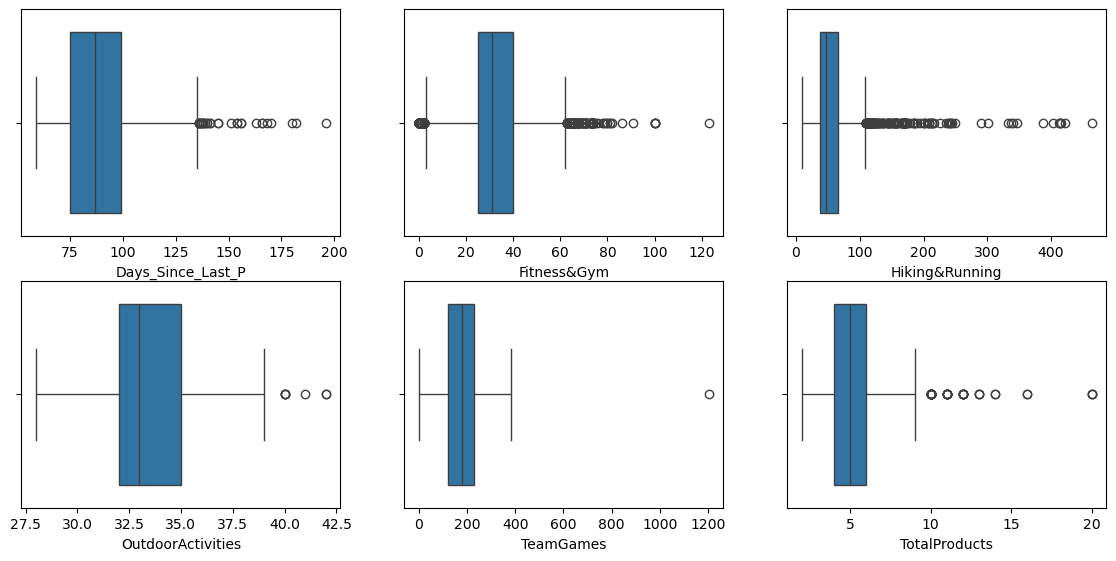

In [82]:
plt.figure(figsize = (14,10))
for i, column in enumerate(products_df_prod.columns.difference(['Last_Purchase'])):
    ax = plt.subplot(3,3, i+1)
    sns.boxplot(data = products_df_prod, x=column)

We can verify that there are outliers in each column in Products data set. To minimize data loss while addressing these outliers, we'll strategically remove only the data points that deviate the most from the overall trend.<br>

With that being said, we believe that it would be a better approach to remove outliers from columns such as `Fitness&Gym` and `TeamGames` since we want to preserve as much data as possible. In the following section, you may find out that we remove outliers only from these 2 columns.

<a name='pprocess_products'></a>

<font color = '#C04000'>
    
## **3.2 Preprocess Data** </font>

<a name='prod_outliers'></a>

<font color = '#C04000'>

### **3.2.1 Data Cleaning - Outliers**

__`Step 55`__ Removing the outliers that differ significantly from observations. Here, we will be removing values greater or equal to 100 and 1000 from `Fitness&Gym` and `TeamGames` respectively.

In [83]:
products_df_prod = products_df_prod[~((products_df_prod["Fitness&Gym"]>=100))]
products_df_prod = products_df_prod[~((products_df_prod["TeamGames"]>1000))]
products_df_prod

Fitness&Gym  Hiking&Running  TeamGames  OutdoorActivities  \
Cust_ID                                                              
4                  0              76        248                 37   
5                  0              75        248                 37   
6                  6              69        215                 34   
9                 36              71        248                 35   
10                 8              97        204                 34   
...              ...             ...        ...                ...   
6489              29              36         53                 32   
6491              38              32        136                 34   
6492              29              39         93                 34   
6495              30              22         37                 35   
6496              38              20         53                 34   

         TotalProducts  Days_Since_Last_P  
Cust_ID                                    
4                    6                 69  
5                    6                 71  
6                    5                 73  
9                    8                 75  
10                   5                 73  
...                ...                ...  
6489                 4                 83  
6491                 5                 87  
6492                 5                 82  
6495                 4                 78  
6496                 3                 80  

[3994 rows x 6 columns]

- We can verify that we have dropped only 6 rows from dataset.

<a name='prod_normalize'></a>

<font color = '#C04000'>

### **3.2.2 Normalizing Data**

__`Step 56`__ Normalizing `Products` data to have a common scale and range before clustering.

In [84]:
products_df_prod_scaled = MinMaxScaler().fit_transform(products_df_prod)
products_df_prod_scaled

array([[0.        , 0.14725275, 0.64583333, 0.64285714, 0.22222222,
        0.0729927 ],
       [0.        , 0.14505495, 0.64583333, 0.64285714, 0.22222222,
        0.08759124],
       [0.06593407, 0.13186813, 0.55989583, 0.42857143, 0.16666667,
        0.10218978],
       ...,
       [0.31868132, 0.06593407, 0.2421875 , 0.42857143, 0.16666667,
        0.16788321],
       [0.32967033, 0.02857143, 0.09635417, 0.5       , 0.11111111,
        0.13868613],
       [0.41758242, 0.02417582, 0.13802083, 0.42857143, 0.05555556,
        0.15328467]])

<a name='modelling_products'></a>

<font color = '#C04000'>
    
## **3.3 Modelling** </font>

<a name='prod_clusters'></a>

<font color = '#C04000'>

### **3.3.1 Identify the right number of clusters**

__`Step 57`__ Applying the Elbow Method.

In [85]:
# Create function to work out optimum number of clusters
ks=range(1,10)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k).fit(products_df_prod)
    inertias.append(model.inertia_)

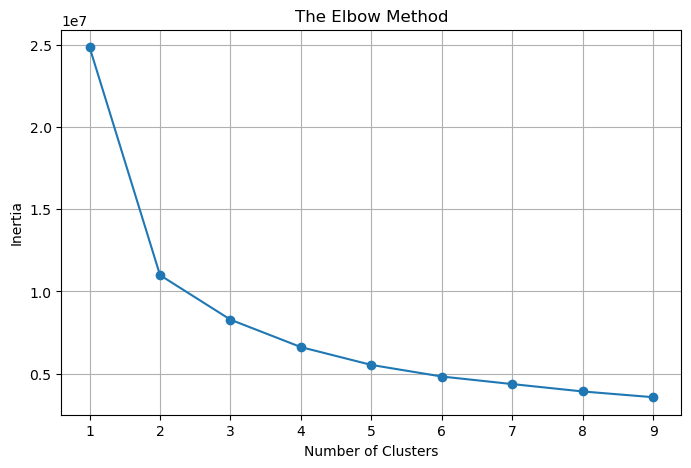

In [86]:
# Generate the elbow plot
fig=plt.subplots(figsize=(8,5))
plt.plot(ks, inertias, 'o-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.grid(True)
plt.show()

__`Step 58`__ Applying Silhouettes Method

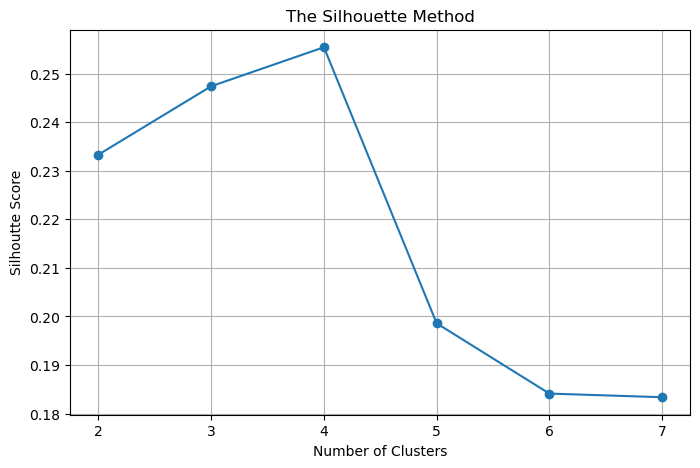

In [87]:
silhouettes=[]
clusters=range(2,8)
for i in clusters:
    model_sil=KMeans(n_clusters=i, random_state=100).fit(products_df_prod_scaled)
    silhouettes.append(silhouette_score(products_df_prod_scaled, model_sil.labels_))

plt.figure(figsize=(8,5))
plt.plot(clusters,silhouettes, 'o-')
plt.title('The Silhouette Method')
plt.xlabel("Number of Clusters")
plt.xticks(clusters)
plt.ylabel("Silhoutte Score")
plt.grid(True)
plt.show()

We can also verify that:
- As we know that a higher silhouette score indicates better-defined clusters, we are going to choose __`k=4`__.

<a name='prod_kmeans'></a>

<font color = '#C04000'>

### **3.3.2 Training the model with K-Means**

__`Step 59`__ Creating a KMeans instance called `model_digital_k4` using `KMeans()` and set `n_clusters` as , `random_state` as 30. Then, fit the instance to your data (a copy of the original dataframe standardized and named as `products_df_prod_scaled`).

In [88]:
model_prod_k4 = KMeans(n_clusters=4, random_state=30).fit(products_df_prod_scaled)

__`Step 60`__ Creating a new column in the dataframe named `label`, which will store the cluster number that each observation belongs to.

In [89]:
products_df_prod["label_kmeans"] = model_prod_k4.labels_
centroids = model_prod_k4.cluster_centers_

__`Step 61`__  Find the centroid of the new clusters using `.mean()`.

In [90]:
products_df_prod.groupby(['label_kmeans']).mean().transpose()

label_kmeans                0           1           2           3
Fitness&Gym         32.593827   51.300885   15.447891   33.160518
Hiking&Running      40.229012   82.231858   71.962779   53.204387
TeamGames          109.511728  234.578761  202.358561  228.421735
OutdoorActivities   33.264815   33.228319   35.259305   33.032901
TotalProducts        4.865432    6.525664    5.851117    4.991027
Days_Since_Last_P   87.738889   77.998230   76.000000  104.516451

- __`Cluster 0` (Low Spenders):__ This cluster __exhibits relatively low values across all categories compared to the other clusters.__ These customers tend to focus their spending on TeamGames products, indicating a potential interest in group-oriented recreational activities. They also have fewer total products purchased and a moderate number of days since their last purchase. We believe this segment may represent customers with limited disposable income or those who prioritize other expenses over recreational activities and sports-related purchases.
  
- __`Cluster 1` (Sport Lovers):__ Customers in this cluster demonstrate the highest average spending in Fitness&Gym, Hiking&Running, and TeamGames compared to the other clusters. They also have a relatively high total number of products purchased and a moderate number of days since their last purchase. __This segment likely comprises individuals who seem to be sports enthusiasts.__
  
- __`Cluster 2` (Outdoor Lovers):__ This cluster shows moderate spending across Hiking&Running and TeamGames. They demonstrate a consistent interest in outdoor pursuits. Customers in this segment also exhibit a higher total number of products purchased compared to Clusters 0 (Low Spenders) and 3 (Occasional Customers). __Their preference for outdoor experiences implies a potential affinity for nature-related adventures such as hiking, camping, or outdoor sports.__

- __`Cluster 3` (Occasional Customers):__ Customers in this cluster exhibit moderately low spending across all categories, similar to Cluster 0, but scoring the 2nd highest on TeamGames. They have the highest number of days since their last purchase. __This segment may include occasional leisure shoppers who make sporadic purchases without a strong commitment to fitness or outdoor activities.__

<a name='prod_visualize_clusters'></a>

<font color = '#C04000'>

### **3.3.3. Visualizing in detail the clusters**

__`Step 62`__  Creating scatter plots in `Products`.

Y:  1 Hiking&Running
Y:  2 TeamGames
Y:  2 TeamGames


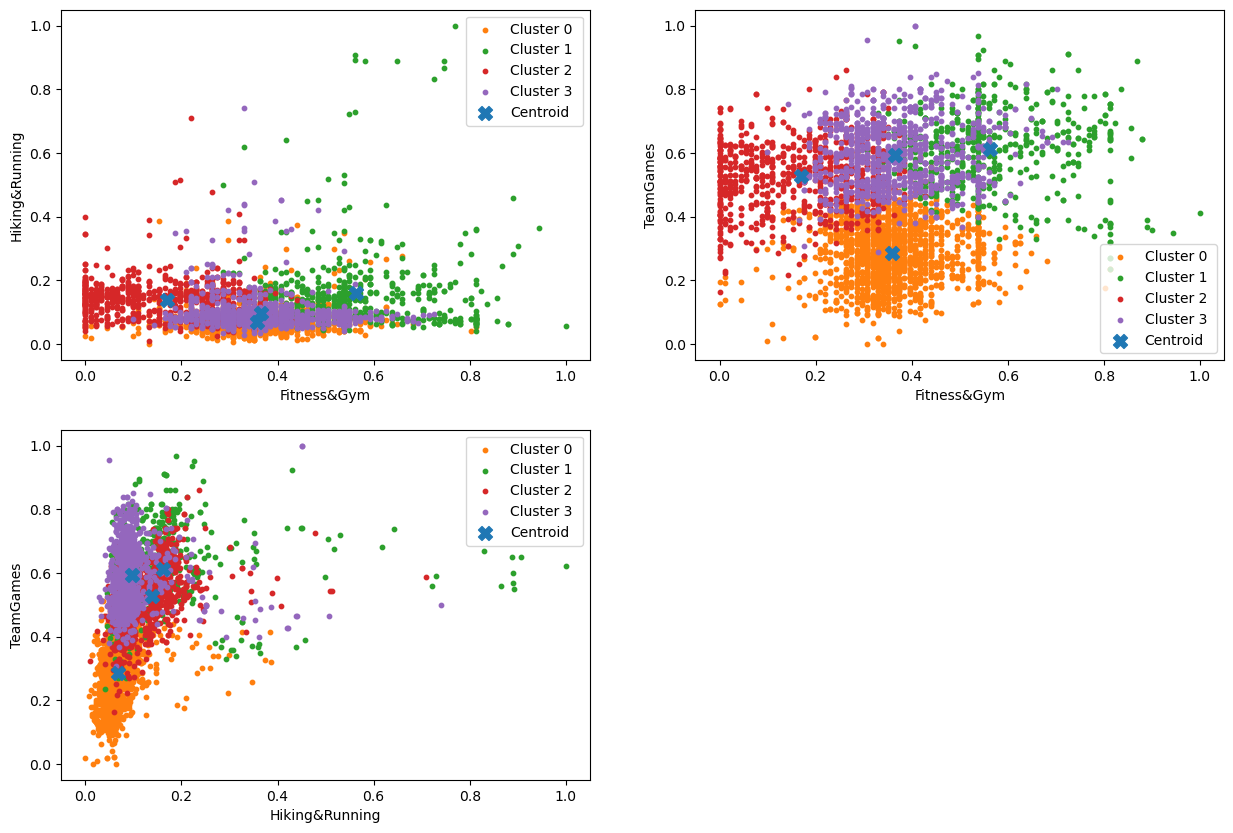

In [91]:
plt.figure(figsize=(15,10))
columns=['Fitness&Gym',	'Hiking&Running', 'TeamGames']
plot_i=1
for i, x in enumerate(columns):   
    list_y=columns[i+1:]
    for j in range(i+1,len(columns)):
        print("Y: " ,j, columns[j] )
        plt.subplot(2,2, plot_i)
        for ii, cen in enumerate(centroids):
            plt.scatter(products_df_prod_scaled[products_df_prod["label_kmeans"]==ii,i], products_df_prod_scaled[products_df_prod["label_kmeans"]==ii,j],s=10, label=f"Cluster {ii} ", color=f'C{ii+1}')
        plt.scatter(centroids[:,i], centroids[:,j],marker='X', label='Centroid', s=100 )
        plt.xlabel(columns[i])
        plt.ylabel(columns[j])
        plt.legend()
        plot_i+=1

- We decided not to plot OutdoorActivities clusters because it looked confusing and a lot spread out.

<a name='prod_PCA_clusters'></a>

<font color = '#C04000'>

### **3.3.4. Applying K-means after performing PCA**

__`Step 63`__ Performing and fitting the PCA model to the scaled dataset `products_df_prod_scaled`.

In [92]:
pca=PCA()
pca.fit(products_df_prod_scaled)

PCA()

__`Step 64`__ Obtaining the proportion of the `products_df_prod_scaled` variance explained by a single principal component

In [93]:
pca.explained_variance_ratio_

array([0.34229422, 0.28714771, 0.15675591, 0.11691157, 0.06151816,
       0.03537242])

__`Step 65`__ Plotting to decide how many features we are going to keep

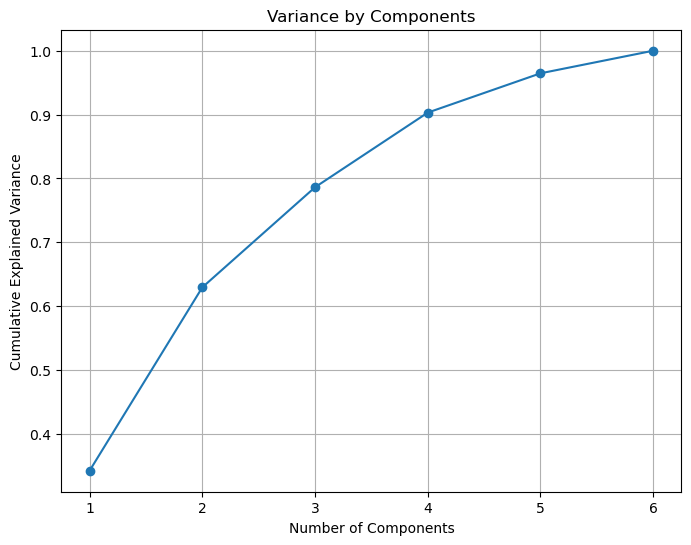

In [94]:
plt.figure(figsize=(8,6))
plt.plot(range(1,7), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

From the plot, we understand that:
- The optimal __number of components__ in PCA that involves a balance between preserving enough information from the original dataset while reducing dimensionality is __3__.

__`Step 66`__ Performing PCA with dimensionality reduction (Number of Components = 3 and Cumulative Explained Variance = 78%) and transforming into 2-dimensional space

In [95]:
pca=PCA(n_components=3)
scores_pca=pca.fit_transform(products_df_prod_scaled)

In [96]:
scores_pca

array([[ 0.04882991, -0.48607348,  0.00155015],
       [ 0.04906623, -0.48158101,  0.01446828],
       [-0.00228701, -0.29650772,  0.02585227],
       ...,
       [-0.22090336,  0.01634327, -0.05230094],
       [-0.37182384,  0.03556364, -0.09254098],
       [-0.30816787,  0.13542983, -0.0864849 ]])

__`Step 67`__ Appling K-means with PCA

In [97]:
model_kmeans_pca=KMeans(n_clusters=4, random_state=30).fit(scores_pca)

In [98]:
products_df_prod[['Component1', 'Component2', 'Component3']]=scores_pca
products_df_prod['label_pca_kmeans']=model_kmeans_pca.labels_

In [99]:
centroids_pca_kmeans=model_kmeans_pca.cluster_centers_

__`Step 68`__ Visualizing K-means with PCA

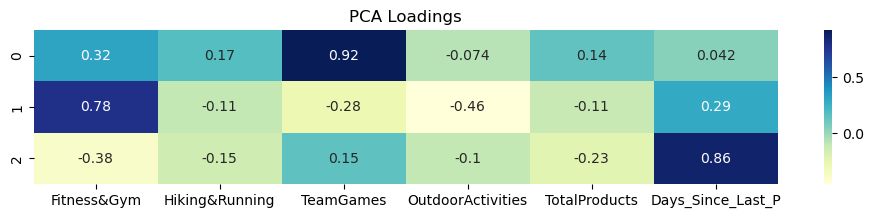

In [100]:
pca_loadings_df=pd.DataFrame(pca.components_, columns=products_df_prod_columns)
plt.figure(figsize=(12, 2))
sns.heatmap(pca_loadings_df, cmap="YlGnBu", annot=True)
plt.title('PCA Loadings')
plt.show()

- __`Component 1`:__ It mainly reflects spending patterns related to __`TeamGames`__, with a strong positive association. It also has some association with `Fitness&Gym` and `Hiking&Running`. `OutdoorActivities` has a weak negative association with this component, __suggesting that customers who spend more on `TeamGames` tend to spend less on `OutdoorActivities`__.
- __`Component 2`:__ It mainly reflects spending patterns related to __`Fitness&Gym`__, with a strong positive association. It shows negative associations with spending on `Hiking&Running`, `TeamGames`, and `OutdoorActivities`, __indicating that customers who spend more on `Fitness&Gym` tend to spend less in these other categories__.
-  __`Component 3`:__ It mainly reflects days passed since last Purchase - __`Days_Since_Last_P`__ with a strong positive association.  It also has some association with `TeamGames`. Plus, `Fitness&Gym`, `Hiking&Running` and `OutdoorActivities` have a weak negative association with this component, __suggesting that customers who has spent more on `TeamGames` tend to spend less on `Fitness&Gym`, `Hiking&Running` and `OutdoorActivities`, but compared to `component 1` they tend to wait longer to re-make Purchases__.

__`Step 69`__ Visualizing clusters from PCA-KMeans

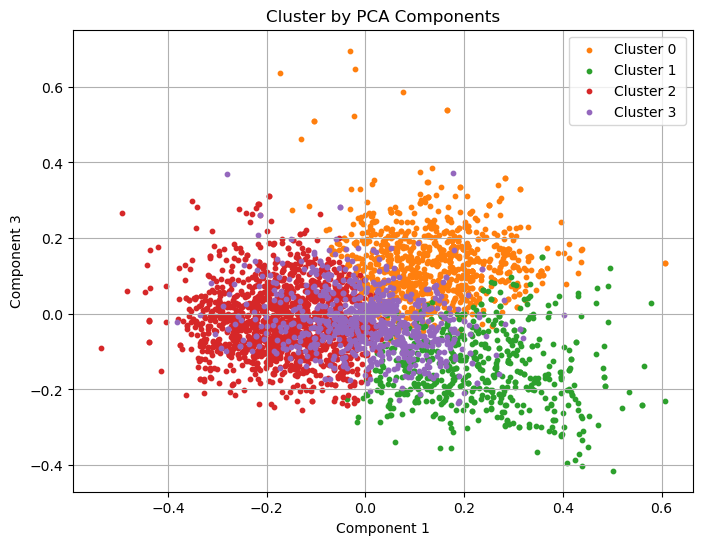

In [101]:
plt.figure(figsize=(8,6))
for ii, cen in enumerate(centroids):
    plt.scatter(scores_pca[products_df_prod['label_pca_kmeans']==ii,0], scores_pca[products_df_prod['label_pca_kmeans']==ii,2],s=10, label=f"Cluster {ii} ", color=f'C{ii+1}')
plt.title("Cluster by PCA Components")
plt.xlabel('Component 1')
plt.ylabel('Component 3')
plt.legend()
plt.grid(True)
plt.show()

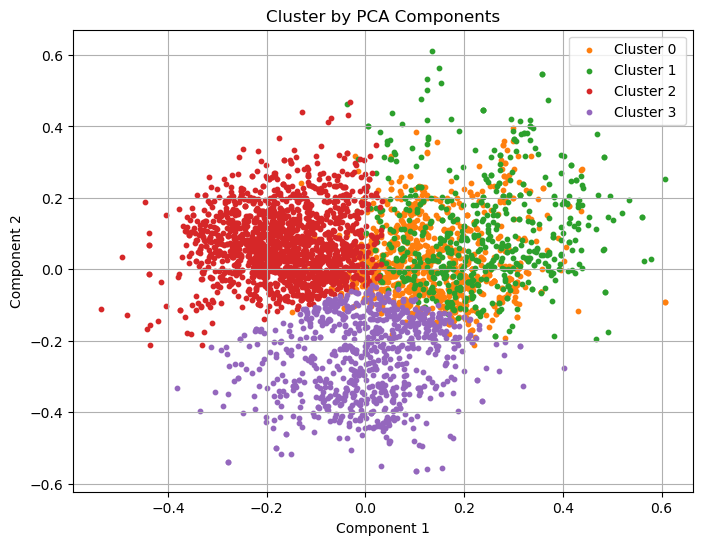

In [102]:
plt.figure(figsize=(8,6))
for ii, cen in enumerate(centroids):
    plt.scatter(scores_pca[products_df_prod['label_pca_kmeans']==ii,0], scores_pca[products_df_prod['label_pca_kmeans']==ii,1],s=10, label=f"Cluster {ii} ", color=f'C{ii+1}')
plt.title("Cluster by PCA Components")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [103]:
products_df_prod.groupby(['label_pca_kmeans'])[products_df_prod_columns].mean().transpose()

label_pca_kmeans            0           1           2           3
Fitness&Gym         33.139839   51.182948   32.722565   15.539877
Hiking&Running      53.328974   82.177620   40.152898   71.895706
TeamGames          228.118712  235.477798  109.506782  202.711656
OutdoorActivities   33.062374   33.150977   33.277435   35.226994
TotalProducts        5.013078    6.481350    4.862515    5.855215
Days_Since_Last_P  104.873239   77.921847   87.716400   75.953374

- __`Cluster 0:`__ Consists of customers who make occasional purchases and demonstrate modest spending habits, categorized as `Low Spenders`.

- __`Cluster 1:`__ Comprises customers with a passion for sports who exhibit regular purchasing behavior, identified as `Sport Lovers`.

- __`Cluster 2:`__ Represents customers who make frequent purchases, particularly showing a preference for Hiking&Running and OutdoorActivities while displaying less interest in Fitness&Gym, labeled as `Outdoor Lovers`.

- __`Cluster 3:`__ Includes customers who make infrequent purchases but show a strong affinity for TeamGames, indicating occasional engagement in sports activities like Fitness&Gym. These customers are labeled as `Occasional Customers`.

Let's also plot all these 3 components in a 3-dimensional scatter. 

In [104]:
fig = px.scatter_3d(x=scores_pca[:, 0], y=scores_pca[:, 1], z=scores_pca[:, 2], color=products_df_prod['label_pca_kmeans'])
fig.update_layout(width=800, height=550)

<a name='prod_DBSCAN_clusters'></a>

<font color = '#C04000'>

### **3.3.5. Applying DBSCAN**

To apply the DBSCAN model, first, we need to obtain its 2 parameters: Min_Samples and Epsilon (Eps):
- __`Min_Samples`__ - Generally 2* Data dimension, so our data has 6 dimensions then 2*6 columns = 12;
- __`Epsilon (Eps)`__ - We have to calculate the distance between each point to its closest neighbor using Nearest Neighbours. After that, sort them and plot, finaly we identify the maximum value at the curvature of the graph, which will define our optimum Eps.

__`Step 70`__ Calculating the K-nearest neighbor (K-NN) distances for each data point in `products_df_prod_scaled` dataset and then plotting the sorted K-NN distances to define __`Eps`__

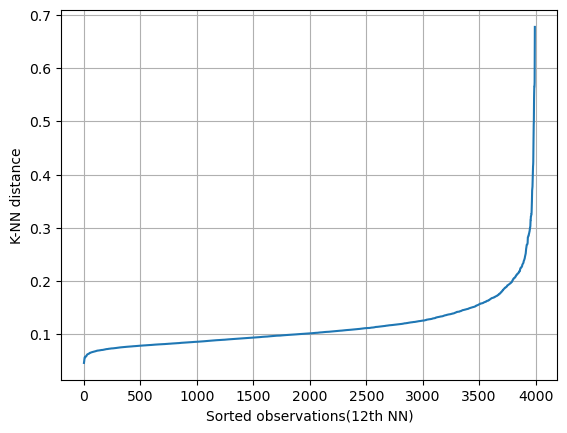

In [105]:
nbrs=NearestNeighbors(n_neighbors=13).fit(products_df_prod_scaled)
dist, ind= nbrs.kneighbors(products_df_prod_scaled)
sort_dist= np.sort(dist, axis=0)
k_dist=sort_dist[:,12]
plt.plot(k_dist)
plt.ylabel("K-NN distance")
plt.xlabel("Sorted observations(12th NN)") # using tthe same as min_samples
plt.grid(True)
plt.show()

From the plot we can verify that:
- The value for our `Eps` should be greater or equal to __0.2__.

In [106]:
epsilons = np.linspace (0.3, 0.9, num=10) 
min_samples = np.arange(12, 14, step=2)
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)

In [107]:
best_values_prod = get_scores_and_labels(combinations, products_df_prod_scaled)

Combination (0.3, 12) on iteration 1 of 10 has 1 clusters. Moving on
Combination (0.3666666666666667, 12) on iteration 2 of 10 has 1 clusters. Moving on
Combination (0.43333333333333335, 12) on iteration 3 of 10 has 1 clusters. Moving on
Combination (0.5, 12) on iteration 4 of 10 has 1 clusters. Moving on
Combination (0.5666666666666667, 12) on iteration 5 of 10 has 1 clusters. Moving on
Combination (0.6333333333333333, 12) on iteration 6 of 10 has 1 clusters. Moving on
Combination (0.7000000000000001, 12) on iteration 7 of 10 has 1 clusters. Moving on
Combination (0.7666666666666668, 12) on iteration 8 of 10 has 1 clusters. Moving on
Combination (0.8333333333333335, 12) on iteration 9 of 10 has 1 clusters. Moving on
Combination (0.9, 12) on iteration 10 of 10 has 1 clusters. Moving on


In [108]:
best_values_prod

{'best_epsilon': 0.3,
 'best_min_samples': 12,
 'best_labels': 'bad',
 'best_score': -10}

In [109]:
products_df_prod['label_dbscan'] = best_values_prod['best_labels']
products_df_prod['label_dbscan'].value_counts()

label_dbscan
bad    3994
Name: count, dtype: int64

We can verify that it has only 1 cluster containing all the data points, for this reason we can say that it didn't perform well. Let's combine it with T-SNE and check the results, as DBSCAN struggles with clusters of similar density.

<a name='prod_TSNE_clusters'></a>

<font color = '#C04000'>

### **3.3.6. Applying t-SNE**

Summary:
- Perplexity is a critical hyperparameter in t-SNE (t-distributed Stochastic Neighbor Embedding), regulating the number of neighbors each point considers;
- By assessing the KL (Kullback-Leibler) divergence metric across different perplexity values, we can determine the most suitable perplexity;
- Lower KL divergence indicates superior results, signifying better preservation of the data's structure.

__`Step 71`__ Applying t-SNE with perplexity = 50 <br>
(it indicates that each point considers approximately 50 nearest neighbors when embedding the data into a lower-dimensional space)

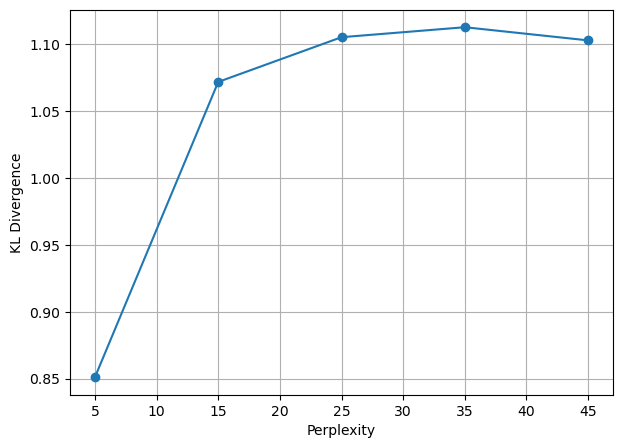

In [110]:
# applying comments on the code below due to execution duration.

kl_divergs=[]
for i in range(5,50,10):
    model=TSNE(n_components=3, init="pca"  , perplexity=i)
    reduced=model.fit_transform(products_df_prod_scaled)
    kl_divergs.append(model.kl_divergence_)

plt.figure(figsize=(7,5))
plt.plot(range(5,50,10), kl_divergs, marker='o')
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.grid(True)
plt.show()

- Its has better results when perplexity = 5, so let's apply perplexity = 5

__`Step 72`__ Applying t-SNE with perplexity = 5

In [111]:
tsne=TSNE(n_components=3, perplexity=5, random_state=42)
tsne_results_products=tsne.fit_transform(products_df_prod_scaled)

__`Step 73`__ Accessing the Kullback-Leibler (KL) divergence value

In [112]:
tsne.kl_divergence_

0.8510583639144897

__`Step 74`__ Generating a scatter plot visualization using Plotly Express (px) to display the results of the t-SNE algorithm.

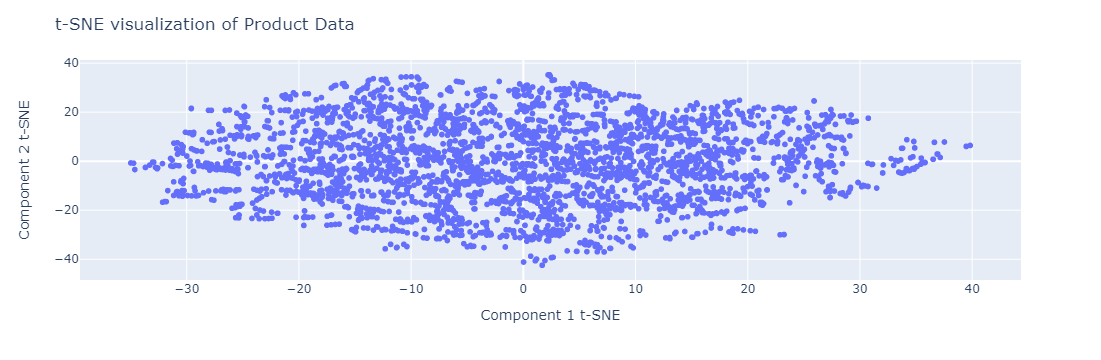

In [113]:
fig = px.scatter(x=tsne_results_products[:, 0], y=tsne_results_products[:, 1])
fig.update_layout(
   title="t-SNE visualization of Product Data",
   xaxis_title="Component 1 t-SNE",
   yaxis_title="Component 2 t-SNE",
 
)
fig.show()

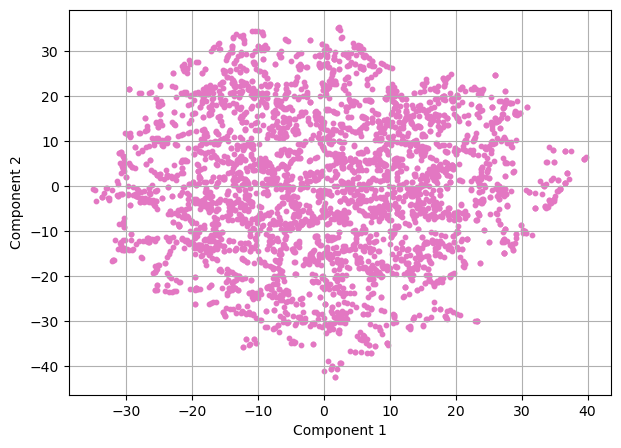

In [114]:
plt.figure(figsize=(7,5))
plt.scatter(tsne_results_products[:, 0], tsne_results_products[:, 1],s=10, label=f"Cluster {i} ", color=f'C{i+1}')
plt.title("")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

<a name='prod_TSNE_kmeans_clusters'></a>

<font color = '#C04000'>

### **3.3.7. Applying K-means after performing t-SNE**

In [115]:
model_kmeans_tsne=KMeans(n_clusters=4, random_state=30).fit(tsne_results_products)

In [116]:
products_df_prod[['Component1_tsne', 'Component2_tsne', 'Component3_tsne']]=tsne_results_products
products_df_prod['label_tsne_kmeans']=model_kmeans_tsne.labels_
centroids_tsne_kmeans=model_kmeans_tsne.cluster_centers_

In [117]:
products_df_prod.groupby('label_tsne_kmeans').size()

label_tsne_kmeans
0    1082
1     946
2     975
3     991
dtype: int64

Visualizing the results

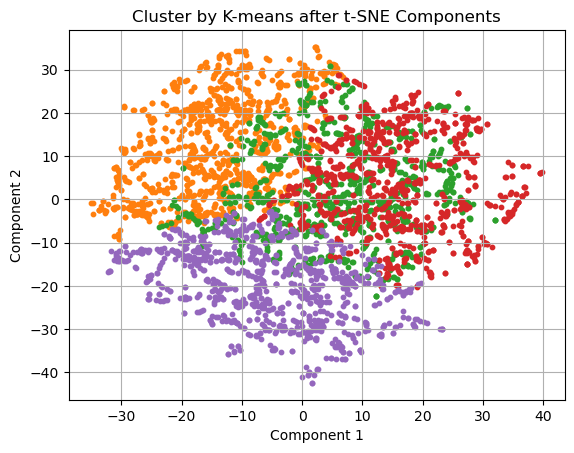

In [118]:
for i in range(4):
    plt.scatter(tsne_results_products[products_df_prod['label_tsne_kmeans']==i,0], tsne_results_products[products_df_prod['label_tsne_kmeans']==i,1],s=10, label=f"Cluster {i} ", color=f'C{i+1}')
plt.title("Cluster by K-means after t-SNE Components")
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

In [119]:
products_df_prod.groupby(['label_tsne_kmeans'])[products_df_prod_columns].mean().transpose()

label_tsne_kmeans           0           1           2           3
Fitness&Gym         31.699630   45.181818   33.437949   18.017154
Hiking&Running      39.906654   69.516913   51.638974   64.286579
TeamGames          109.560074  197.105708  234.346667  170.191726
OutdoorActivities   32.557301   33.872093   32.980513   35.103935
TotalProducts        4.712569    6.060254    5.012308    5.622603
Days_Since_Last_P   87.177449   79.000000  103.713846   82.856710

- __`Cluster 0`__ (Low Spenders) - Are the customers who dont buy occasionally and dont buy a lot, labeled as `Low Spenders` (they are very similar to K-means Cluster 0) .
- __`Cluster 1`__ (Sport Lovers) - Are the customers who love sports, labeled as `Sport Lovers` and buy regularly (they are very similar to K-means Cluster 1).
- __`Cluster 2`__ - Are the customers who don't frequently buys, who love TeamGames (the highest number) labeled as `Occasional Customers`. We assume they dont practice sports like Fitness&Gym regularly (they are very similar to K-means Cluster 3).
- __`Cluster 3`__ - Are the customers who most buys frequently, they love Hiking&Running and OutdoorActivities, they dont like Fitness&Gym, labeled as `Outdoor Lovers` (they are very similar to K-means Cluster 2).

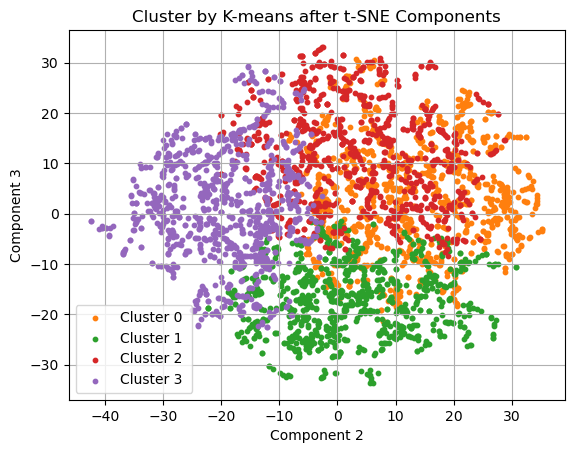

In [120]:
for i in range(4):
    plt.scatter(tsne_results_products[products_df_prod['label_tsne_kmeans']==i,1], tsne_results_products[products_df_prod['label_tsne_kmeans']==i,2],s=10, label=f"Cluster {i} ", color=f'C{i+1}')
plt.title("Cluster by K-means after t-SNE Components")
plt.xlabel('Component 2')
plt.ylabel('Component 3')
plt.legend()
plt.grid(True)
plt.show()

Comparing the results of the different clustering algorithms

In [122]:
sil_scores = {
    "K-means": silhouette_score(products_df_prod_scaled, products_df_prod['label_kmeans']),
    "K-means with pca ": silhouette_score(products_df_prod_scaled, products_df_prod['label_pca_kmeans']),
    "K-means with tsne": silhouette_score(products_df_prod_scaled, products_df_prod['label_tsne_kmeans']),
    #"DBSCAN": silhouette_score(products_df_prod_scaled, products_df_prod['label_dbscan']),
}

In [123]:
sil_scores

{'K-means': 0.25540136654768403,
 'K-means with pca ': 0.255148016702867,
 'K-means with tsne': 0.16419909391201926}

By the above-mentioned information, we can conclude that K-Means and K-means with PCA seem to have higher scores. Having very similar clusters, we will be using K-means with PCA algorithm and defining our labels accordingly.

In [124]:
label_products_cluster= {0: "Low Spenders", 1: "Sport Lovers", 2: "Occasional Customers", 3: "Outdoor Lovers" }

In [125]:
products_df_prod["label_pca_kmeans"]=products_df_prod['label_pca_kmeans']
products_df_prod["Cluster_product_label"]=products_df_prod['label_pca_kmeans'].map(lambda x: label_products_cluster[x]) 

<a name='demographic'></a>

<font color = '#872657'>
    
# **4. Demographic** </font>

<a name='explore_demographic'></a>

<font color = '#872657'>
    
## **4.1 Explore Data** </font>

<a name='demo_basic_exploration'></a>

<font color = '#872657'>

### **4.1.1 Basic Exploration**

__`Step 31`__ Get more information of `Demographic` dataset by calling the method `info()`

In [126]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cust_ID          4000 non-null   int64 
 1   name             4000 non-null   object
 2   birth_year       4000 non-null   int64 
 3   education_level  4000 non-null   object
 4   dependents       4000 non-null   int64 
 5   City             2019 non-null   object
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


We can verify that we are working with:
- 3 objects variable;
- 3 integer variables.

We can also verify that we have a lot of missing values in `City`. We are going to analyze it in a further step.

__`Step 32`__ Check the first five rows of the dataset to see what it shows.

In [127]:
demographic_df.head(5)

Cust_ID                 name  birth_year        education_level  \
0        4    Mr Daniel Spencer        2002                 Master   
1        5  Miss Abigail Garcia        1994            high school   
2        6  Miss Laura Williams        2005                    PhD   
3        9   Mr Justin Hamilton        2003            high school   
4       10     Mr Steven Vaughn        2002  less than high school   

   dependents        City  
0           1         NaN  
1           0  Birmingham  
2           1         NaN  
3           0         NaN  
4           0         NaN

We can also check that:
- We have a __`birth_year`__ column. We will use it to create a new column __`age`__
- Lets look into the  relation between age, education and dependents
- Looking at __`name`__, as we have "Miss" and "Mr" we decided to separate them by gender. So we will create a new column __`gender`__

<a name='demo_statis_exploration'></a>

<font color = '#87265'>

### **4.1.2 Statistical Exploration**

__`Step 33`__ Making a copy of Demographic dataset to explore the data

In [128]:
demographic_df_prod=demographic_df.copy()

__`Step 34`__ Setting the index

In [129]:
demographic_df_prod.set_index('Cust_ID', inplace=True)

__`Step 35`__ Getting the main descriptive statistics for all the categorical variables

In [130]:
demographic_df_prod.describe(include='O')

name education_level        City
count                 4000            4000        2019
unique                3892               7           3
top     Mr Michael Jackson     high school  Birmingham
freq                     4            1280        1284

We can verify that:
- We have 7 differents `education_level`. Let's have a look into them.

__`Step 36`__ Checking the levels/possible values in the variables "Education Level" using the method `value_counts()`

In [131]:
demographic_df_prod["education_level"].value_counts()

education_level
high school              1280
Bachelor                 1023
less than high school     818
Master                    666
PhD                       150
High School                42
PHD                        21
Name: count, dtype: int64

Looking at `education_level` we can check that:
- We have 2 different values for "high school" and for "PhD". We need to replace those values for a unique one.

__`Step 37`__ Checking the levels/possible values in the variables "City".

In [132]:
demographic_df['City'].value_counts()

City
Birmingham    1284
London         700
Brimingham      35
Name: count, dtype: int64

Looking at `City` we can verify that:
- We have 2 different values for the same city "Birmingham". Plus, the half of the data seems to be missing.

<a name='pprocess_demo'></a>

<font color = '#87265'>
    
## **4.2 Preprocess Data** </font>

<a name='demo_data_transformation'></a>

<font color = '#87265'>

### **4.2.1 Data Transformation**

__`Step 38`__ Creating the variable "age" from the "birth_year".

In [133]:
demographic_df_prod["age"]=datetime.now().year-demographic_df_prod["birth_year"]

__`Step 39`__ Creating the variable "Gender" from the "name".

In [134]:
demographic_df_prod["gender"]=demographic_df_prod["name"].apply(lambda x: 'Female' if x.split(' ')[0]=='Miss' else 'Male')

__`Step 40`__ Replacing "PHD" and "high school" values

In [160]:
demographic_df_prod["education_level"]=demographic_df_prod["education_level"].str.title()
demographic_df_prod["education_level"].replace({"Phd": "PhD"}, inplace=True)
demographic_df_prod["education_level"].value_counts()

education_level
High School              1322
Bachelor                 1023
Less Than High School     818
Master                    666
PhD                       171
Name: count, dtype: int64

__`Step 41`__ Dropping __`birth_year`__ column

In [136]:
demographic_df_prod.drop("birth_year", axis=1, inplace=True)

__`Step 42`__ Get the main descriptive statistics for __`age`__ variable

In [137]:
demographic_df_prod.describe().T

count    mean        std   min   25%   50%   75%   max
dependents  4000.0   0.298   0.498757   0.0   0.0   0.0   1.0   2.0
age         4000.0  34.701  16.398836  18.0  22.0  27.0  44.0  80.0

Looking at `age`, we can verify that:
- 50% of the customers, are less than 27 years old.
- They barely have dependents.

__`Step 43`__ Dropping __`City`__ column, as we have only 2 cities and almost 50% of the data is missing.

In [138]:
demographic_df_prod.drop("City", axis=1, inplace=True)

__`Step 44`__ Having a look at our final data.

In [139]:
demographic_df_prod.head(5)

name        education_level  dependents  age  gender
Cust_ID                                                                     
4          Mr Daniel Spencer                 Master           1   22    Male
5        Miss Abigail Garcia            High School           0   30  Female
6        Miss Laura Williams                    PhD           1   19  Female
9         Mr Justin Hamilton            High School           0   21    Male
10          Mr Steven Vaughn  Less Than High School           0   22    Male

<a name='analyzing_further'></a>

<font color = '#5865F2'>
    
# **5. Analyzing further** </font>

In [140]:
customers_clusters_df=pd.merge(demographic_df_prod, products_df_prod[["label_pca_kmeans","Cluster_product_label"]], on='Cust_ID' , how="outer")
customers_clusters_df.rename(columns={"label_pca_kmeans": 'label_products'}, inplace=True)

In [141]:
customers_clusters_df=pd.merge(customers_clusters_df, digital_df_prod[["label_tsne_dbscan", "Cluster_digital_label", "App_Clicks"]], on='Cust_ID' , how="outer")
customers_clusters_df.rename(columns={"label_tsne_dbscan": 'label_digital'}, inplace=True)

In [142]:
customers_clusters_df[customers_clusters_df["App_Clicks"].isna()]

Empty DataFrame
Columns: [name, education_level, dependents, age, gender, label_products, Cluster_product_label, label_digital, Cluster_digital_label, App_Clicks]
Index: []

In [143]:
from collections import Counter
customers_clusters_agg=customers_clusters_df.groupby(['Cluster_digital_label', 'Cluster_product_label']).agg({ 'age':['count','mean'],
                                                                                                              'gender' :  lambda x: Counter(x).most_common(1)[0][0],
                                                                                                              'education_level' :  lambda x: Counter(x).most_common(1)[0][0],
                                                                                                             
                                                                                                             })
customers_clusters_agg.columns=['Count', 'Mean_age','Most_freq_gender', 'Most_freq_Education']
customers_clusters_agg=customers_clusters_agg.sort_values(by='Count', ascending=False)
customers_clusters_agg

Count   Mean_age  \
Cluster_digital_label Cluster_product_label                     
Influencers           Occasional Customers     775  28.630968   
Curious-Viewers       Occasional Customers     506  41.069170   
Influencers           Low Spenders             478  29.073222   
                      Outdoor Lovers           379  29.506596   
App users             Occasional Customers     341  37.730205   
Curious-Viewers       Low Spenders             306  42.447712   
                      Outdoor Lovers           268  42.820896   
Influencers           Sport Lovers             267  27.820225   
App users             Low Spenders             210  38.842857   
                      Outdoor Lovers           168  36.458333   
Curious-Viewers       Sport Lovers             162  39.981481   
App users             Sport Lovers             134  37.910448   

                                            Most_freq_gender  \
Cluster_digital_label Cluster_product_label                    
Influencers           Occasional Customers            Female   
Curious-Viewers       Occasional Customers              Male   
Influencers           Low Spenders                    Female   
                      Outdoor Lovers                  Female   
App users             Occasional Customers              Male   
Curious-Viewers       Low Spenders                      Male   
                      Outdoor Lovers                    Male   
Influencers           Sport Lovers                    Female   
App users             Low Spenders                      Male   
                      Outdoor Lovers                    Male   
Curious-Viewers       Sport Lovers                      Male   
App users             Sport Lovers                      Male   

                                               Most_freq_Education  
Cluster_digital_label Cluster_product_label                         
Influencers           Occasional Customers                Bachelor  
Curious-Viewers       Occasional Customers             High School  
Influencers           Low Spenders           Less Than High School  
                      Outdoor Lovers                   High School  
App users             Occasional Customers                Bachelor  
Curious-Viewers       Low Spenders                     High School  
                      Outdoor Lovers                   High School  
Influencers           Sport Lovers                        Bachelor  
App users             Low Spenders                     High School  
                      Outdoor Lovers                   High School  
Curious-Viewers       Sport Lovers                        Bachelor  
App users             Sport Lovers                        Bachelor

__Our Customers overview:__

- __`Influencers && Occasional Customers`__ - These female customers (consisting of our majority of customers) with Bachelors degree are likely individuals at their late 20's, who have the potential to influence others purchasing decisions but make purchases sporadically themselves. Despite their influence, they may not prioritize spending on products regularly.
  
- __`Curious-Viewers && Occasional Customers`__ - These male customers at their 40's exhibit a curious behavior towards products or content but do not make frequent purchases. Their engagement level suggests interest, but they may not have the financial means or inclination to buy regularly.
  
- __`Influencers && Low Spenders`__ - These female customers (not holding a very high education level) have influence potential but tend to spend less on purchases. Despite their ability to influence others, they may have limited spending capacity or preferences for budget-friendly options.
  
- __`Influencers && Outdoor Lovers`__ - These female customers, categorized as influencers, exhibit a preference for outdoor activities or products despite having a High School education. They may have influence potential but also have a passion for outdoor pursuits, reflecting a diverse range of interests.
  
- __`App users && Occasional Customers`__ - These male customers, identified as app users, primarily engage with the Company's app but demonstrate sporadic purchasing behavior. Despite having a Bachelor's degree, they make occasional purchases, indicating a lack of consistent spending habits.
  
- __`Curious-Viewers && Low Spenders`__ - These male customers, apart from being the oldest, exhibit curiosity towards the Company but tend to spend less on purchases. With a High School education, they make occasional purchases, suggesting limited spending capacity or other priorities.

- __`Curious-Viewers && Outdoor Lovers`__ - These male customers, being the oldest (same as the previous) and categorized as curious-viewers, exhibit a passion for outdoor activities or products despite having a High School education.

- __`Influencers && Sport Lovers`__ - These yougest female customers, identified as influencers, exhibit influence potential and also demonstrate a passion for sports-related products or activities. With a Bachelor's degree, they actively engage in sports-related pursuits, reflecting both personal interest and influence potential.
  
- __`App users && Low Spenders`__ - These male customers primarily engage with Company's app but tend to spend less on purchases. With a High School education, they demonstrate limited spending habits.
  
- __`App users && Outdoor Lovers`__ - These male customers, identified as app users, exhibit a preference for outdoor activities or products despite having a High School education.

- __`Curious-Viewers && Sport Lovers`__- These male customers demonstrate curiosity towards products and also exhibit a passion for sports-related activities or products. With a Bachelor's degree, they actively engage in both exploring products and sports-related pursuits.

- __`App users && Sport Lovers`__ - These male customers (consisting of our minority of customers) primarily engage with mobile apps and also exhibit a strong affinity for sports-related products or activities. With a Bachelor's degree, they actively engage in sports-related pursuits while utilizing mobile apps.

<a name='dt_analyzing_further'></a>

<font color = '#5865F2'>
    
## **5.1. Digital Contact** </font>

__`Step xxx`__ To see the relation between our digital clusters (from Kmeans) and gender

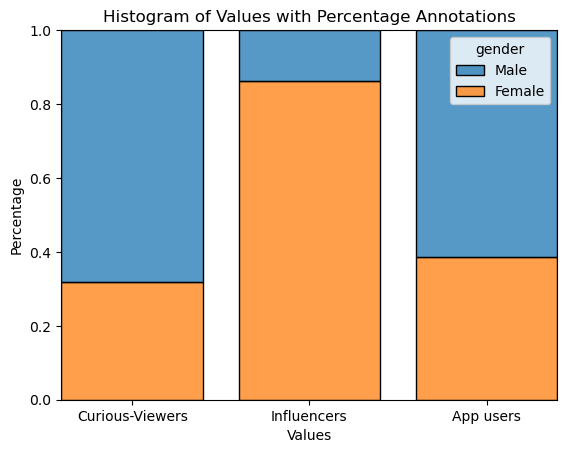

In [144]:
hist_plot =sns.histplot(data=customers_clusters_df, x='Cluster_digital_label',  stat='percent',  hue='gender',  shrink=0.8,  bins=10, multiple='fill')

plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('Histogram of Values with Percentage Annotations')

# Display the plot
plt.show()

We can check that:
- The `Curious Viewers` are mainly Males (68%);
- The `Influencers` are mainly Female (86%);
- The `App users` are more Males (61%) than Females.

__`Step xxx`__ To see the relation between our digital clusters (from Kmeans) and age

<Axes: xlabel='Cluster_digital_label', ylabel='age'>

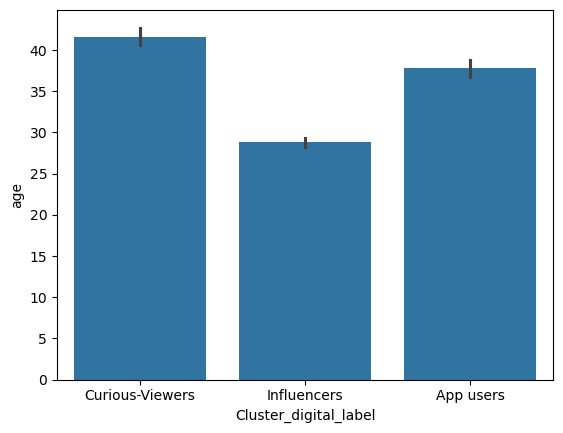

In [145]:
sns.barplot(data=customers_clusters_df,x='Cluster_digital_label' , y='age')

We can check that:
- The `Curious Viewers` are the `olders`;
- The `Influencers` are the `youngers`;
- The `App users` are the `mid age`.

<a name='prod_analyzing_further'></a>

<font color = '#5865F2'>
    
## **5.2. Products** </font>

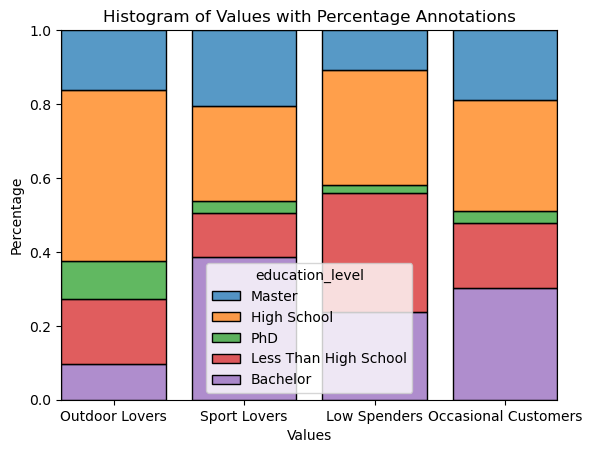

In [146]:
hist_plot =sns.histplot(data=customers_clusters_df, x='Cluster_product_label',  stat='percent',  hue='education_level',  shrink=0.8,  bins=10, multiple='fill')

plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('Histogram of Values with Percentage Annotations')

# Display the plot
plt.show()

- __`Outdoor Lovers`__ - This cluster demonstrates a higher percentage of individuals with a High School education level and PhD qualifications. High School graduates may have limited disposable income for gym memberships, leading them to prefer outdoor activities for social gatherings and leisure. Similarly, individuals with PhDs, often burdened with research commitments, may opt for outdoor pursuits like running or hiking to alleviate stress.

- __`Sport Lovers`__ -  This segment, characterized by higher spending, primarily comprises individuals with Bachelor's and Master's degrees, likely indicating higher income levels. The prevalence of Bachelor's degree holders suggests a correlation between higher education and increased spending on fitness products. Moreover, individuals with higher education levels may prioritize physical health and wellness, driving their expenditure on such products.
  
- __`Low Spenders`__ - Individuals in this cluster predominantly have educational backgrounds below high school or high school diplomas, suggesting lower income levels. The lack of higher education may contribute to lower income and, consequently, reluctance to spend on fitness products. 

- __`Occasional Customers`__ - This group, consisting mainly of individuals with Bachelor's and Master's degrees, displays a preference for Team Games over individual sports activities. Despite their higher education levels, they exhibit sporadic spending behavior, possibly due to a lower interest in sports-related products or other financial priorities.

<Axes: xlabel='Cluster_product_label', ylabel='age'>

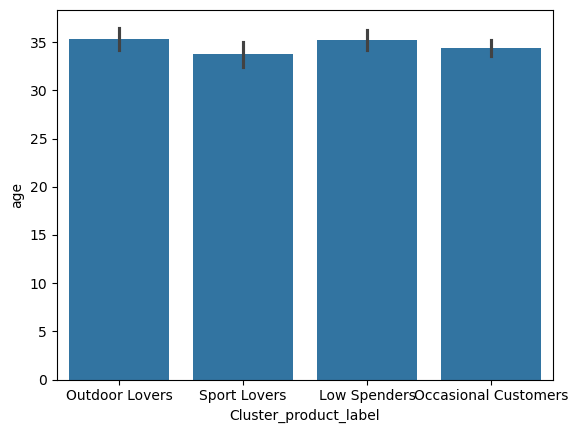

In [147]:
sns.barplot(data=customers_clusters_df,x='Cluster_product_label'  , y='age')

We can check that:
- Sport Lovers are the youngest;
- Outdoor Lovers are the oldest;
- Occasional Customers are the 2nd youngests.

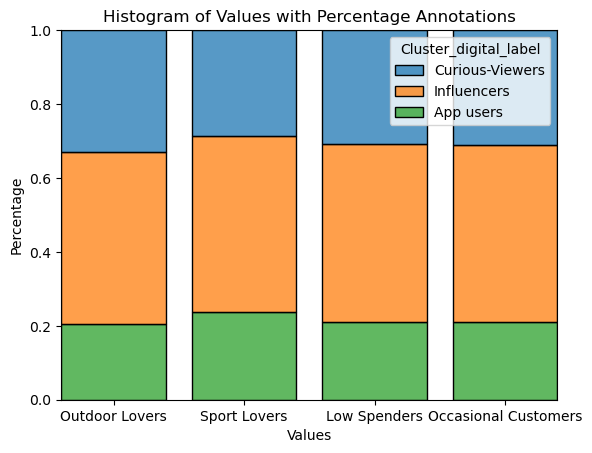

In [148]:
hist_plot =sns.histplot(data=customers_clusters_df, x='Cluster_product_label',  stat='percent',  hue='Cluster_digital_label',  shrink=0.8,  bins=10, multiple='fill')

plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('Histogram of Values with Percentage Annotations')

# Display the plot
plt.show()

- Sport Lovers are the App users and the real consumers.

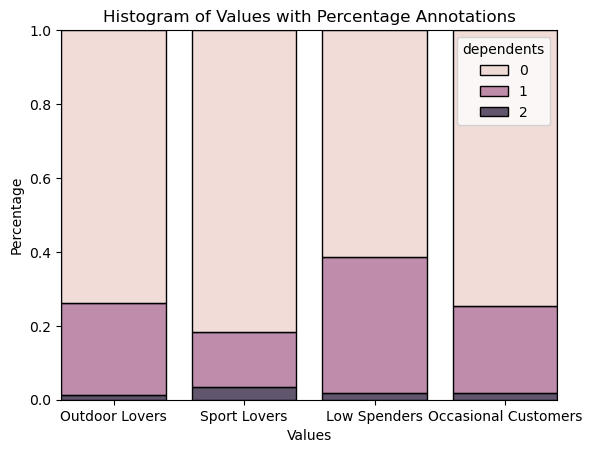

In [149]:
hist_plot =sns.histplot(data=customers_clusters_df, x='Cluster_product_label',  stat='percent',  hue='dependents',  shrink=0.8,  bins=10, multiple='fill')

plt.xlabel('Values')
plt.ylabel('Percentage')
plt.title('Histogram of Values with Percentage Annotations')

# Display the plot
plt.show()

- The customers with `no dependents` are the ones more interested in sports products, also their percentage is higher for every category. Their percentage is higher in `Sport Lovers` category
- The customers with `1 dependent` have a higher percentage in `Low Spenders` category

<a name='KNN_imputer'></a>
 
## **Annex 1. KNN Imputer Method**

As previously mentioned in section 2.2.1 we will be applying KNN Imputer to fill the missing values we have in `SM_Shares`. 

In [150]:
digital_df_KNN = digital_df.copy()

In [151]:
digital_df_KNN['SM_Shares'].isnull().sum()

39

In [152]:
impute_knn = KNNImputer(n_neighbors=5)
imputed_df = impute_knn.fit_transform(digital_df_KNN)
digital_df_KNN['SM_Shares'] = imputed_df[:,-2]

In [153]:
digital_df_KNN['SM_Shares'].isnull().sum()

0

In [154]:
digital_df['SM_Shares'].describe()

count    3961.000000
mean        8.355971
std         8.696192
min         0.000000
25%         1.000000
50%         2.000000
75%        16.000000
max        26.000000
Name: SM_Shares, dtype: float64

In [155]:
digital_df_zero = digital_df.copy()
digital_df_zero['SM_Shares'] = digital_df_zero['SM_Shares'].fillna(0.0)
digital_df_zero['SM_Shares'].describe()

count    4000.000000
mean        8.274500
std         8.692557
min         0.000000
25%         1.000000
50%         2.000000
75%        16.000000
max        26.000000
Name: SM_Shares, dtype: float64

In [156]:
digital_df_KNN['SM_Shares'].describe()

count    4000.000000
mean        8.364850
std         8.696114
min         0.000000
25%         1.000000
50%         2.000000
75%        16.000000
max        26.000000
Name: SM_Shares, dtype: float64

Comparision between different methods:

* __Leaving missing values as is__: The mean is `8.356350` and std is `8.691656`.
* __Filling with Zeros__: The mean becomes `8.274500` while std `8.692557`.
* __Filling with KNN Imputer__: The mean becomes `8.356350` while std `8.691656`.

To conclude, KNN Imputer imputes missing values based on the values of similar data points. By using the nearest neighbors to impute missing values, it preserves the local structure of the data, which can be important for maintaining the integrity of the dataset.